In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Loading The DataSet

In [2]:
# Loading the train data
df = pd.read_csv('./train.csv')

In [3]:
df.head()

ID             Candidate        Constituency ∇ Party  Criminal Case  \
0   0            M.K. Mohan            ANNA NAGAR   DMK              4   
1   1  Khatik Ramesh Prasad           KARERA (SC)   BJP              0   
2   2      Dr. Mantar Gowda              MADIKERI   INC              0   
3   3          Kundan Kumar             BEGUSARAI   BJP              0   
4   4       Swapan Majumder  BANGAON DAKSHIN (SC)   BJP              2   

  Total Assets Liabilities           state      Education  
0   211 Crore+    2 Crore+      TAMIL NADU       8th Pass  
1     1 Crore+           0  MADHYA PRADESH      12th Pass  
2     7 Crore+     22 Lac+       KARNATAKA  Post Graduate  
3     9 Crore+     24 Lac+           BIHAR  Post Graduate  
4     2 Crore+     61 Lac+     WEST BENGAL       8th Pass

In [4]:

X = df
y = df['Education']
for row in X.index:
    # Check for Dr. in the list
    if "Dr." in X.loc[row, "Candidate"]:
        X.loc[row, "isDoctor"] = 1
    else:
        X.loc[row, "isDoctor"] = 0
    if "Adv." in X.loc[row, "Candidate"]:
        X.loc[row, "isAdvocate"] = 1
    else:
        X.loc[row, "isAdvocate"] = 0
X = X.drop('Candidate',axis=1)
X = X.drop('Constituency ∇',axis=1)
X.drop('ID',axis=1,inplace=True)
for row in X.index:
    #Remove WhiteSpaces in State in the middle of the string.
    X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
    # print(X.loc[row, "Total Assets"][-4:])
    if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
        X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
        X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
    elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
        X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
        X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
    elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
        X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
        X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
    elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
        X.loc[row,  "Total Assets"] = "0"
for row in X.index:
    if(isinstance(X.loc[row, "Liabilities"], float)):
        X.loc[row, "Liabilities"] = "0"
    elif(X.loc[row, "Liabilities"][-4:] == "Lac+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
    elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
    elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
        X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
        X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
    elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
        X.loc[row, "Liabilities"] = "0"
# Mapping Parties to unique values in the dataframe using map function
# Create a dictionary of the parties and their corresponding unique values
party = X['Party'].unique()
party = {value: idx for idx, value in enumerate(party)}
# Add a value for nan parties
party[""] = -1
# Mapping the values to the dataframe
X['Party'] = X['Party'].map(party)
state = X['state'].unique()
state = {value: idx for idx, value in enumerate(state)}
# Mapping the values to the dataframe
X['state'] = X['state'].map(state)
education = y.unique()
education = {value: idx for idx, value in enumerate(education)}
# Mapping the values to the dataframe
y = y.map(education)
X['Education'] = y

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Party          2059 non-null   int64  
 1   Criminal Case  2059 non-null   int64  
 2   Total Assets   2059 non-null   object 
 3   Liabilities    2059 non-null   object 
 4   state          2059 non-null   int64  
 5   Education      2059 non-null   int64  
 6   isDoctor       2059 non-null   float64
 7   isAdvocate     2059 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 128.8+ KB


In [6]:
X.isnull().sum()

Party            0
Criminal Case    0
Total Assets     0
Liabilities      0
state            0
Education        0
isDoctor         0
isAdvocate       0
dtype: int64

In [7]:
X.head()

Party  Criminal Case Total Assets Liabilities  state  Education  isDoctor  \
0      0              4      2110000       20000      0          0       0.0   
1      1              0        10000           0      1          1       0.0   
2      2              0        70000        2200      2          2       1.0   
3      1              0        90000        2400      3          2       0.0   
4      1              2        20000        6100      4          0       0.0   

   isAdvocate  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0

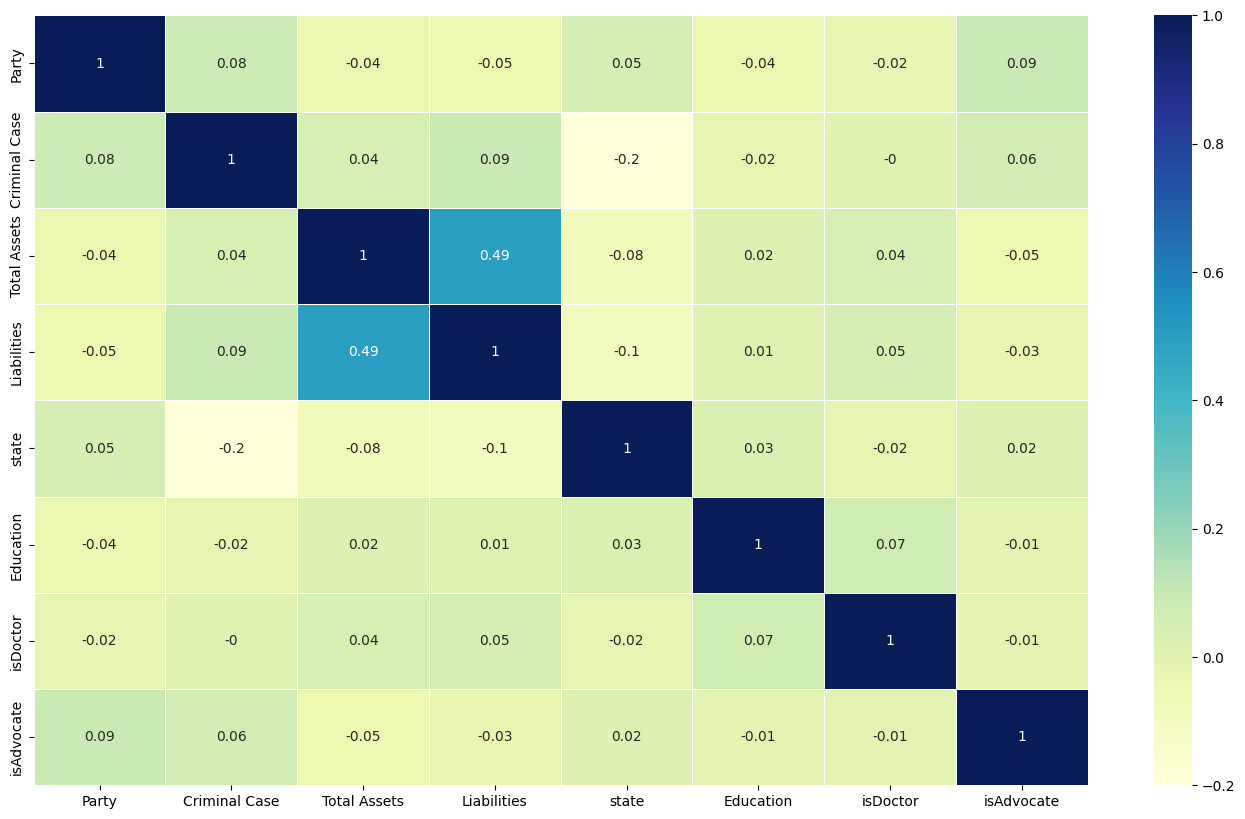

In [8]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(X.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [9]:
X_Train_StateWise = []
Y_Train_StateWise = []
for i in range(len(state)):
	X_Train_StateWise.append(X[X['state'] == i].drop('state',axis=1))
	Y_Train_StateWise.append(X[X['state'] == i]['Education'])
Y = X['Education']

In [10]:
reversed_state = {value: key for key, value in state.items()}

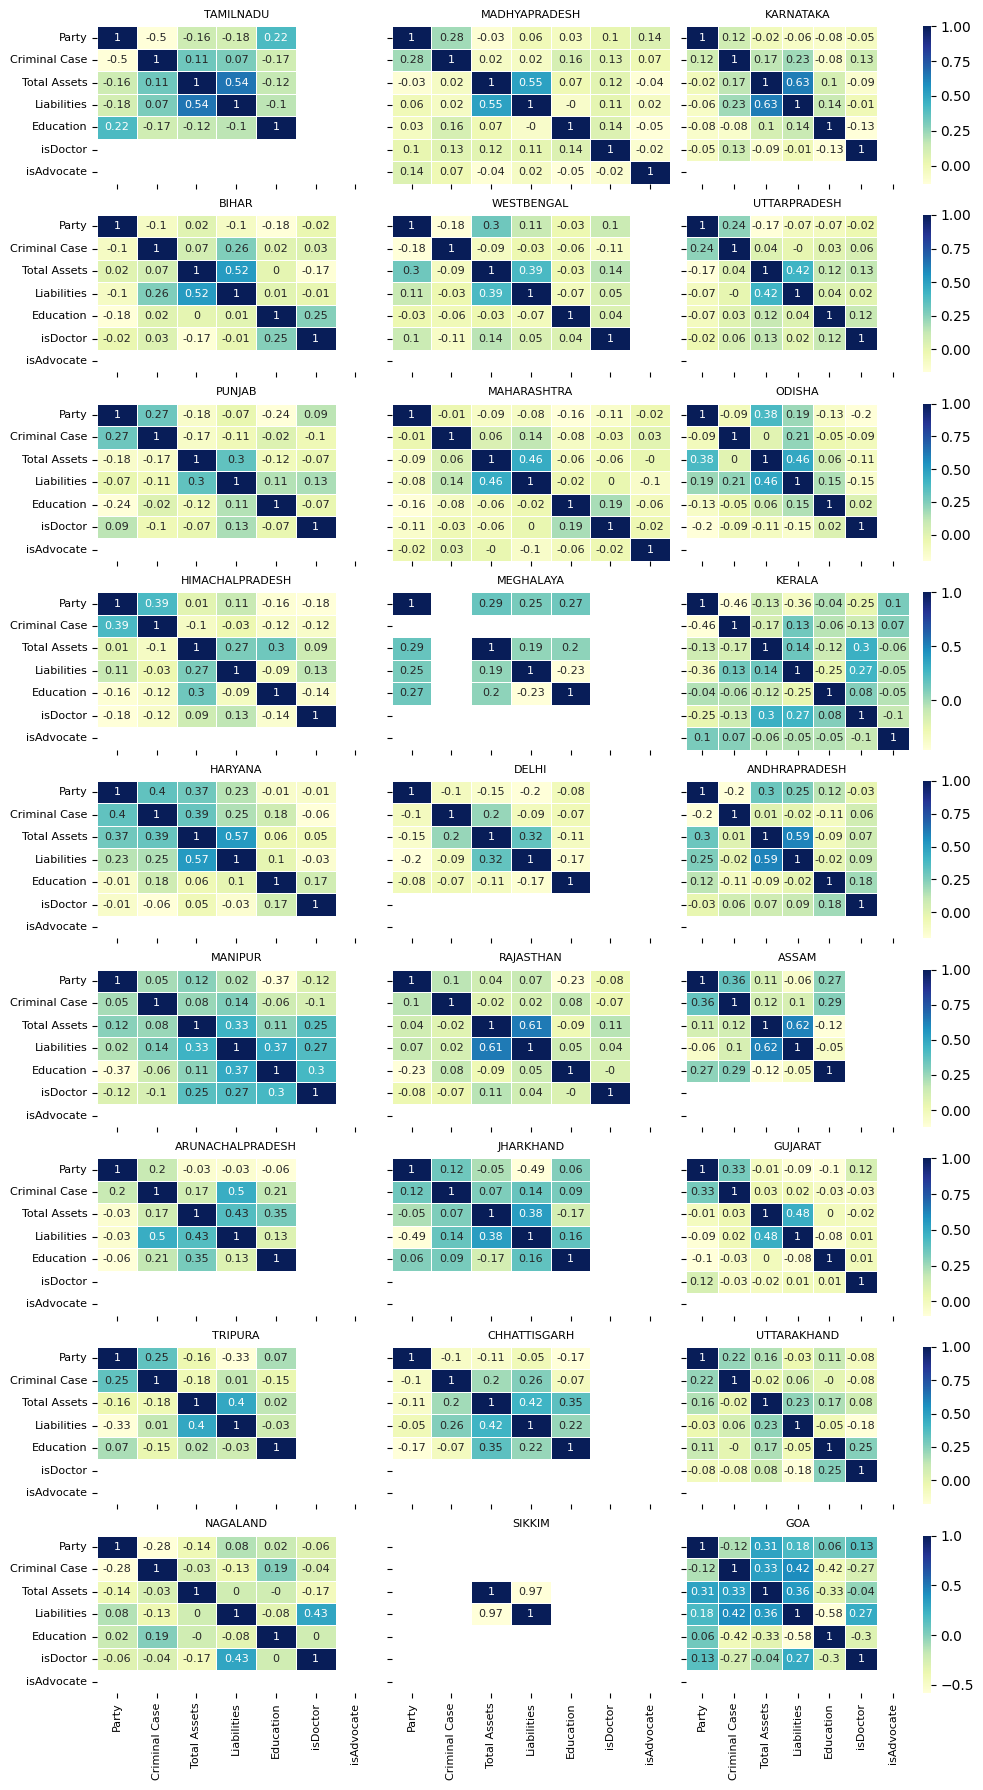

In [11]:
num_states = len(state)  # Calculate the number of states
cols = 3  # Adjust columns as needed (you'll get cols * rows subplots)
rows = (num_states // cols) + (num_states % cols > 0)  - 1 # Calculate rows for a balanced layout

fig, axes = plt.subplots(rows, cols, figsize=(10, 2 * rows))  # Create a figure with subplots

for i, state_df in enumerate(X_Train_StateWise):
    row = i // cols
    col = i % cols
    if(i == num_states - 1):
        break
    ax = axes[row, col]  # Access the subplot for the current state
    
    g = sns.heatmap(state_df.corr(method='spearman').round(2), 
                linewidth=0.5, annot=True, cmap="YlGnBu", ax=ax,
                fmt='.2g', annot_kws={"size": 8}, cbar=col == cols-1) # Changes here
    ax.set_title(f"{reversed_state[i]}", fontsize=8)  # Set the title for the current state
    if col != 0:
        ax.set_yticklabels([])
    if row != rows - 1:
        ax.set_xticklabels([])
    # Reduce font size (adjust depending on your visual needs)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Adjust subplot spacing to prevent overlaps
plt.show()

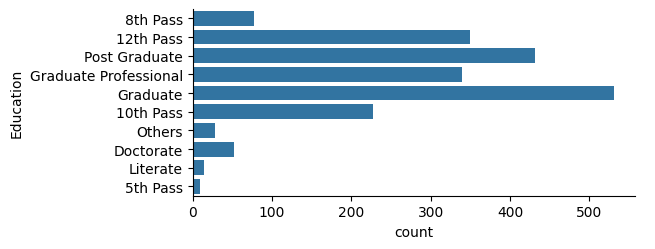

In [12]:
ax = sns.catplot(y="Education", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

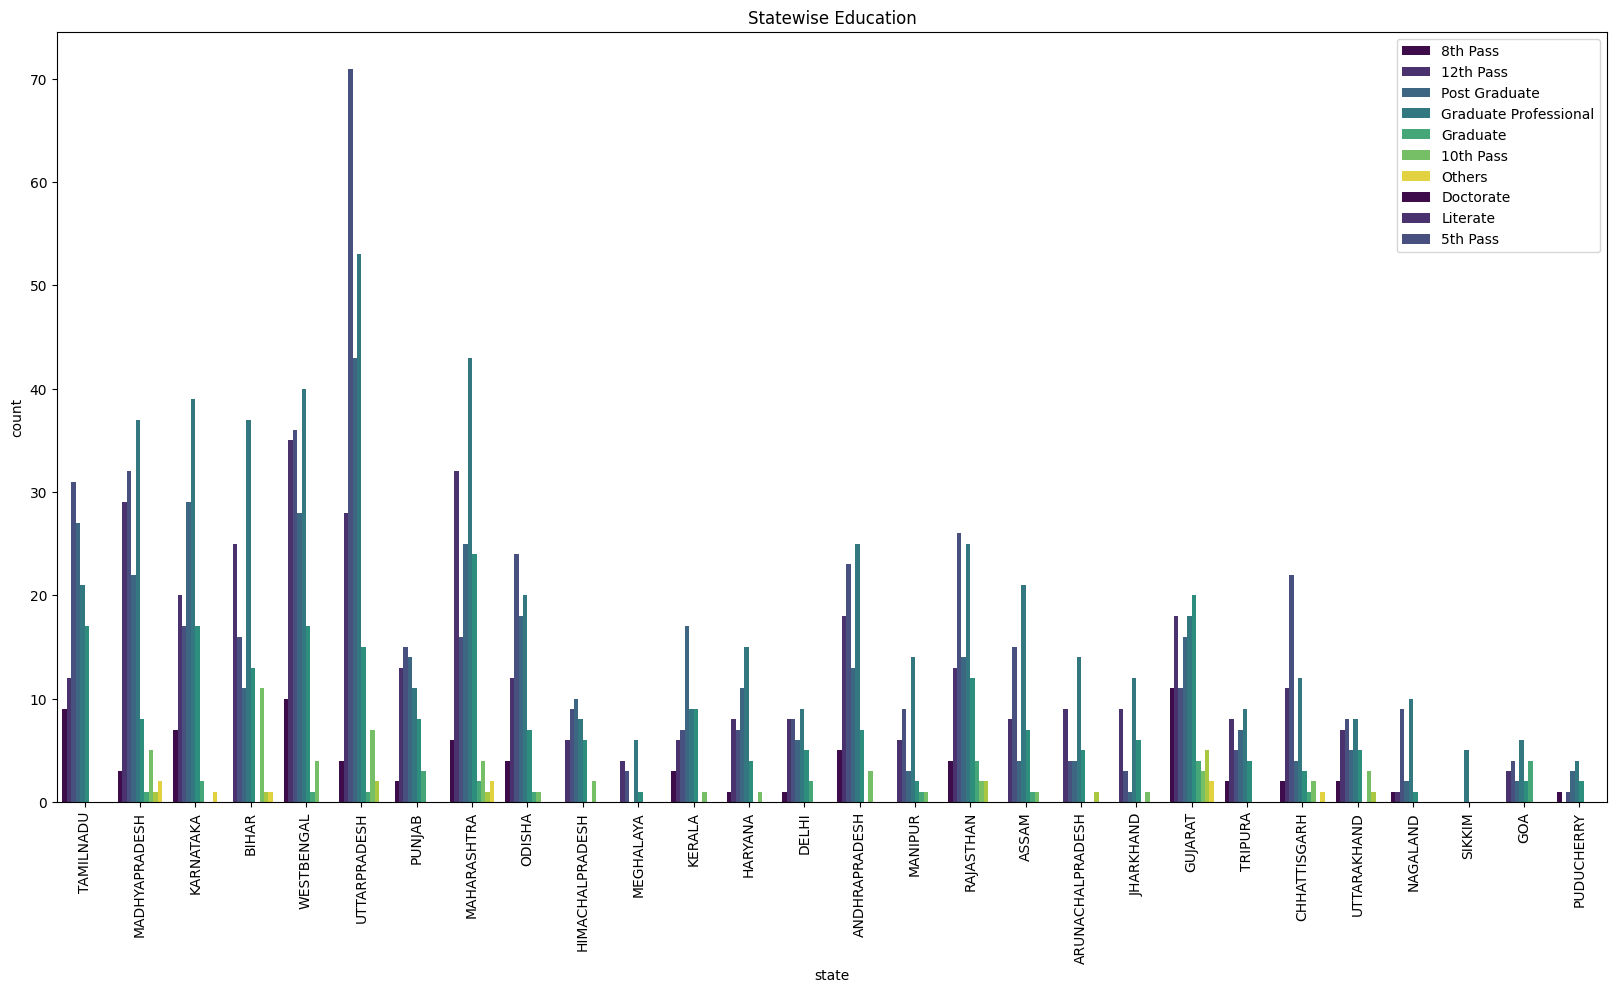

In [13]:
# SnS Plot for statewise education
plt.figure(figsize=(20, 10))
# Get X Labels
X_labels = reversed_state.values()
# Get Y Labels
Y_labels = education.keys()
sns.countplot(x='state', data=X, hue='Education', palette='viridis')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
# Legend
plt.legend(Y_labels, loc='upper right')
plt.title('Statewise Education')

plt.show()



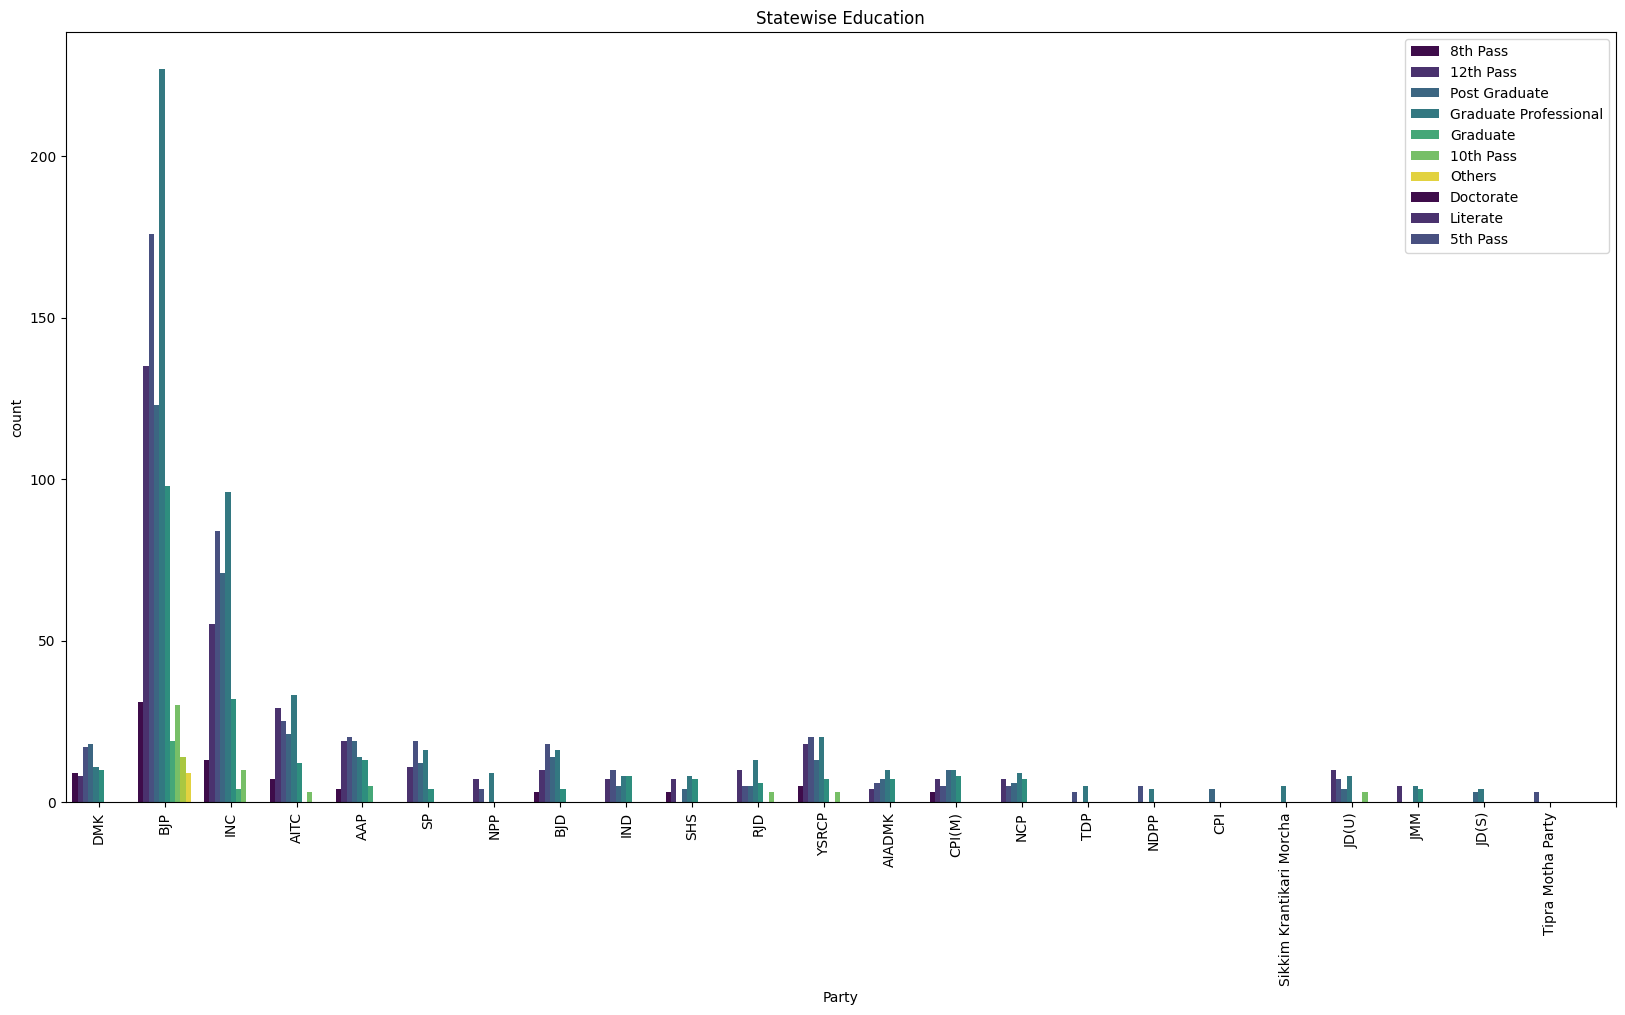

In [14]:
# SnS Plot for partywise education
plt.figure(figsize=(20, 10))
# Get X Labels
X_labels = party.keys()
# Get Y Labels
Y_labels = education.keys()
sns.countplot(x='Party', data=X, hue='Education', palette='viridis')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
# Legend
plt.legend(Y_labels, loc='upper right')
plt.title('Statewise Education')

plt.show()



In [15]:
# Criminal Case vs Party
criminal_cases = []
for i in range(len(state)):
	# Take a sum of all the criminal cases in the state
    temp = (X[X['state'] == i]['Criminal Case'])
    sum = temp.sum()
    count = temp[temp >= 1].count()
    avg = sum / len(X[X['state'] == i])
    percent = count / len(X[X['state'] == i])
    criminal_cases.append([sum, count, avg, percent])

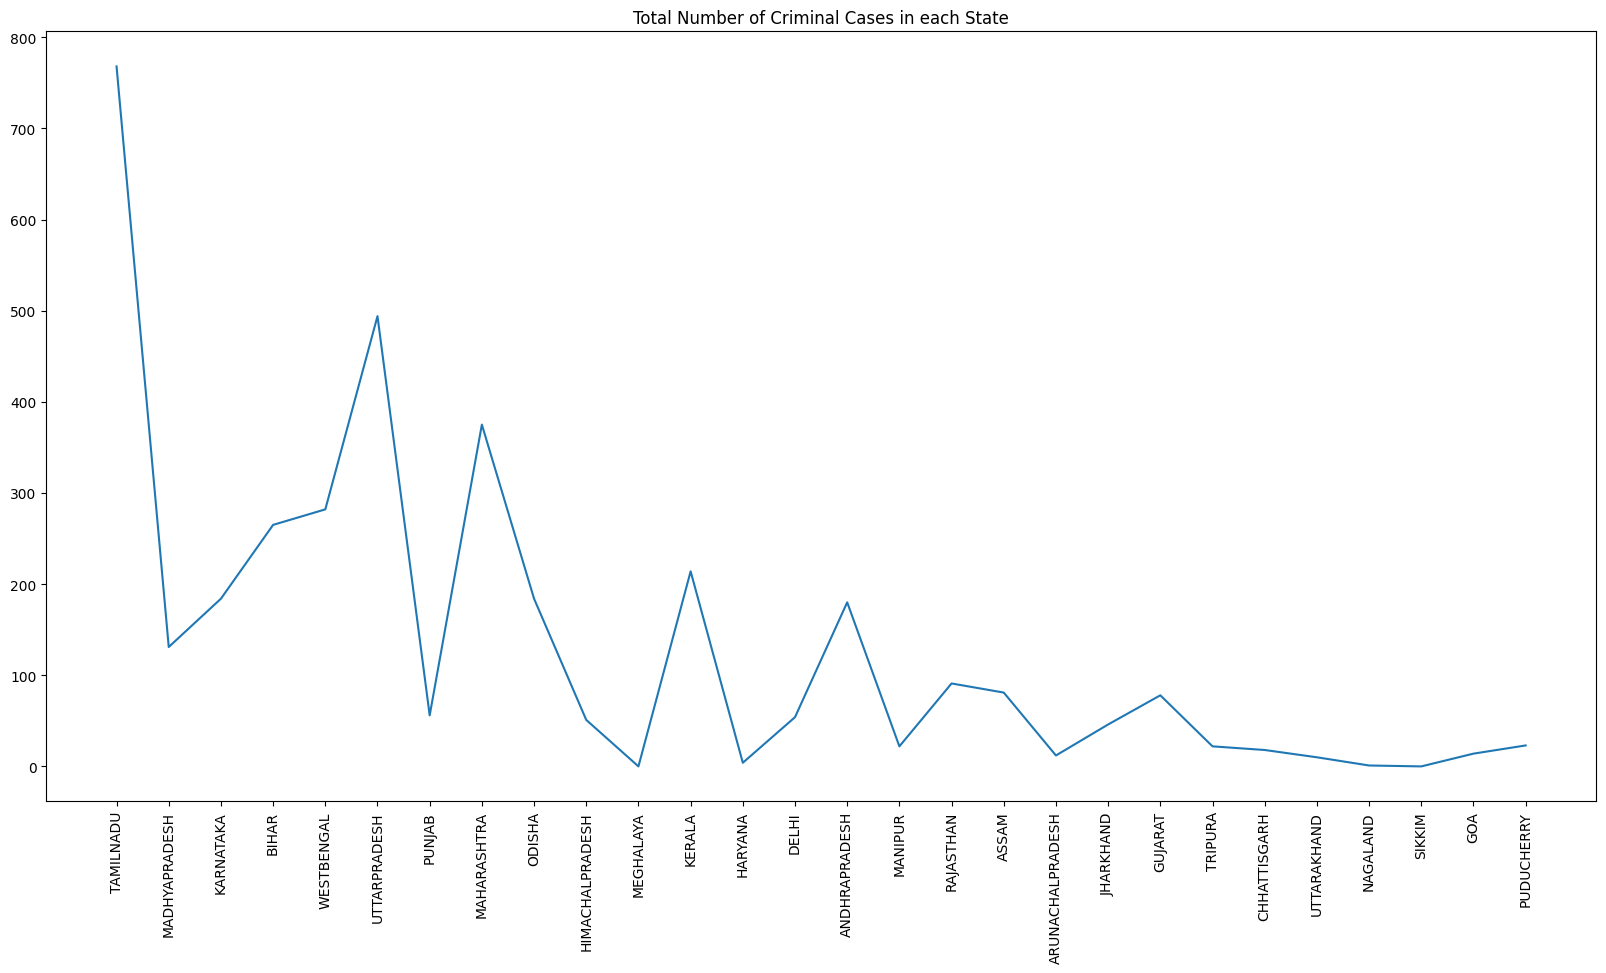

In [16]:
# Plots State Vs Criminal Cases

criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Total Number of Criminal Cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 0], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


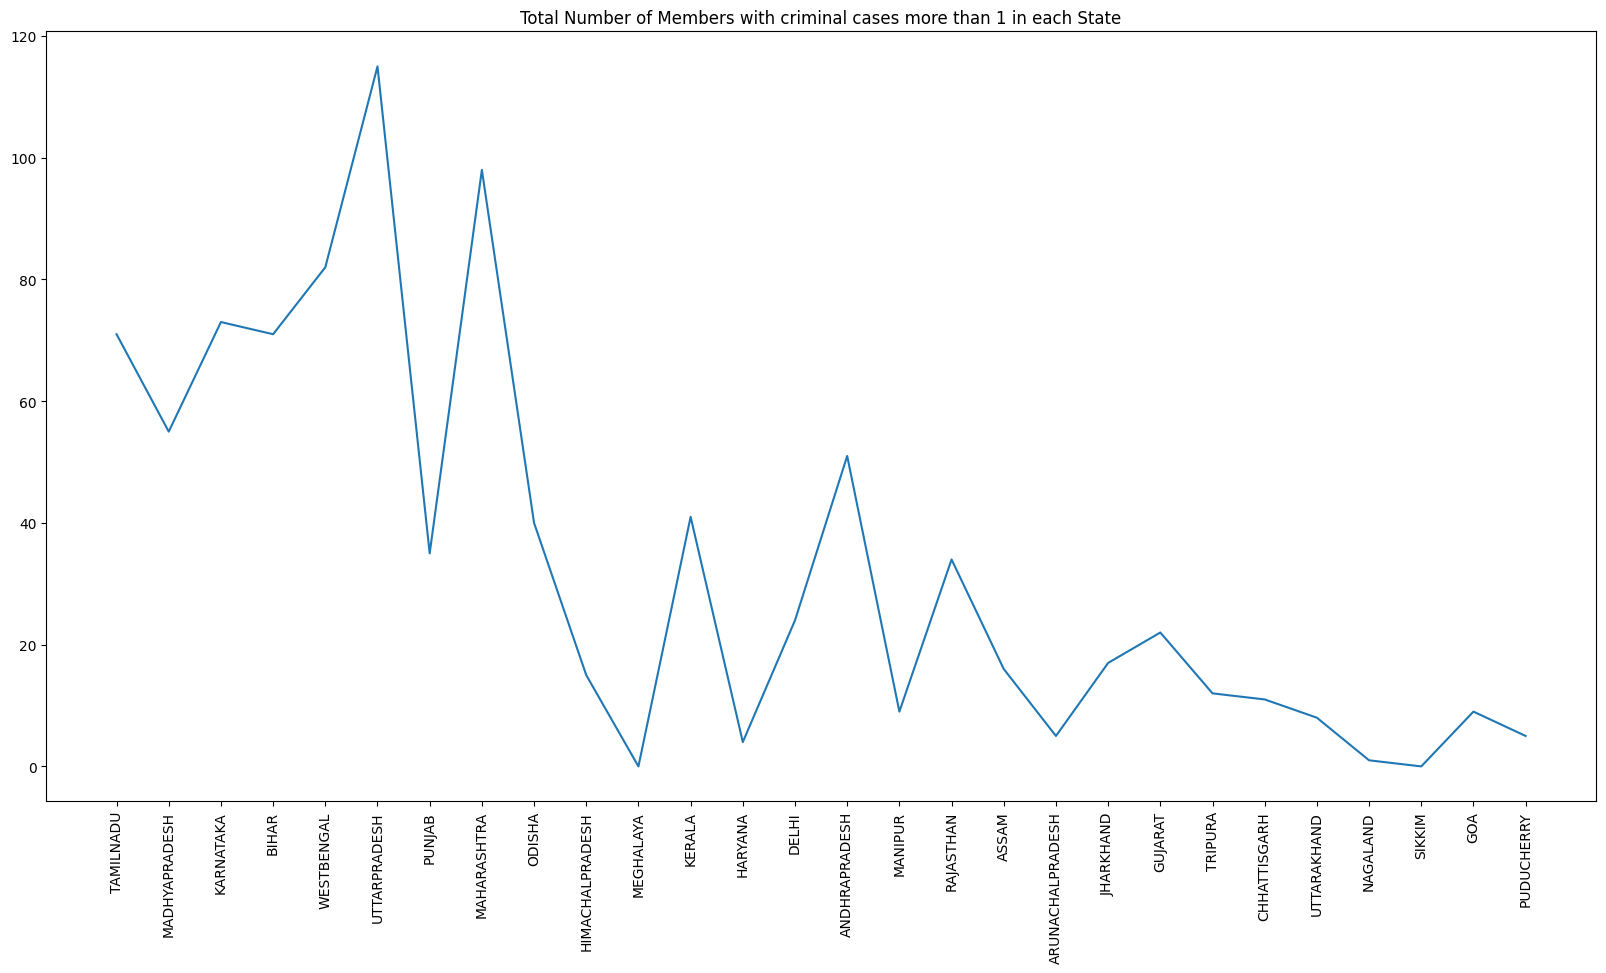

In [17]:

plt.figure(figsize=(20, 10))
plt.title('Total Number of Members with criminal cases more than 1 in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 1], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


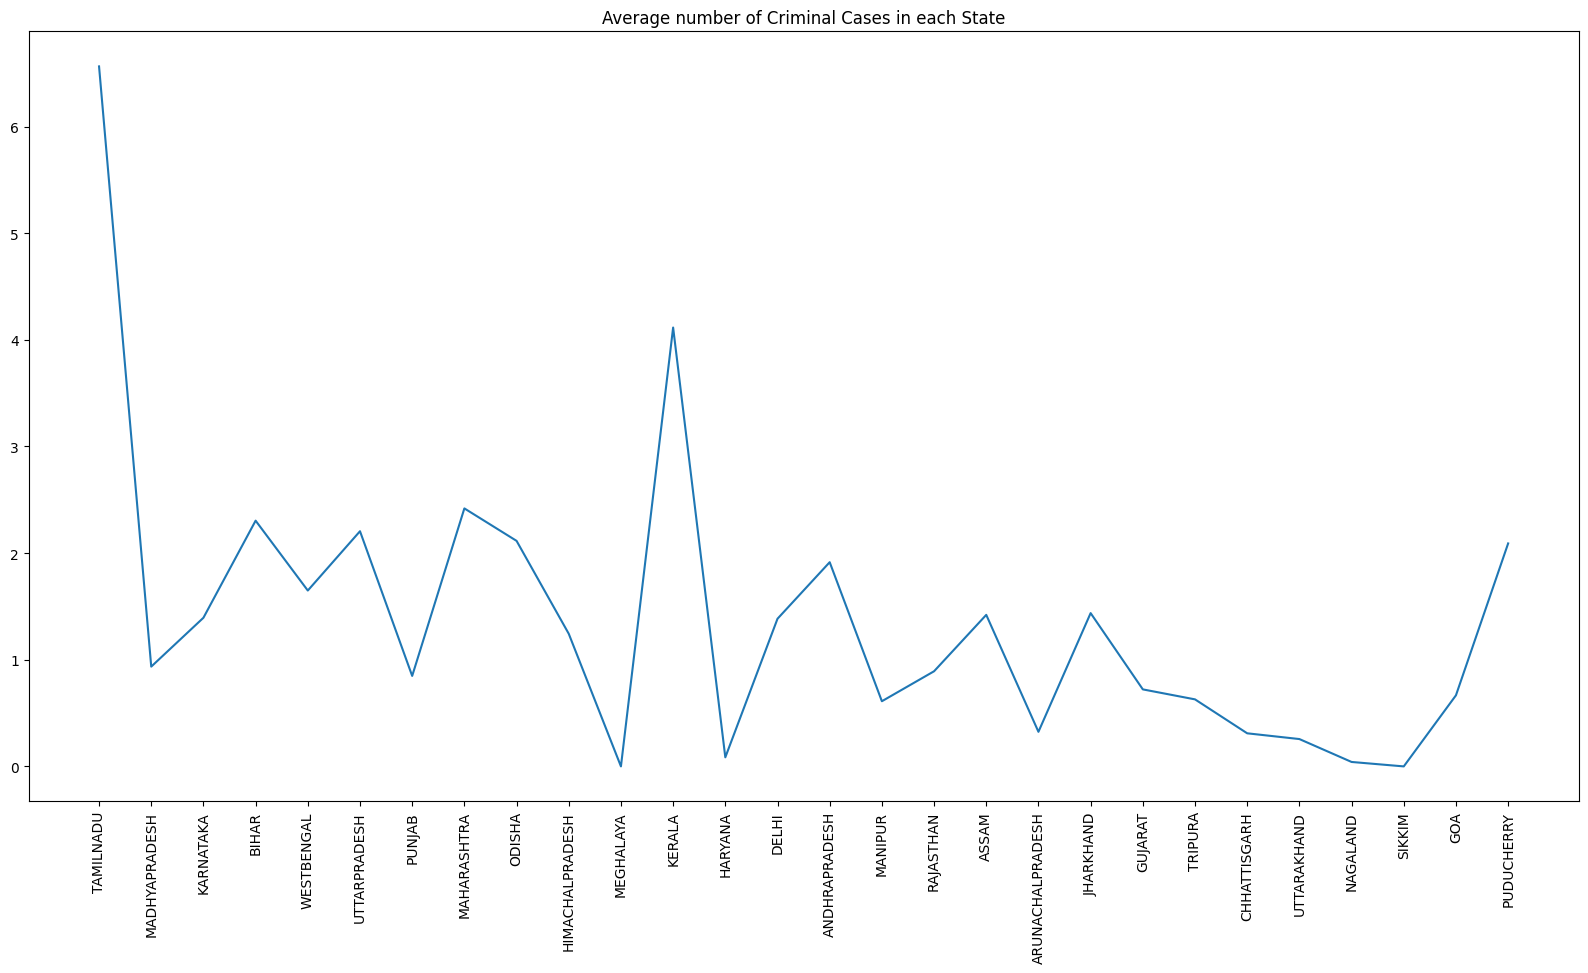

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Average number of Criminal Cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 2], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


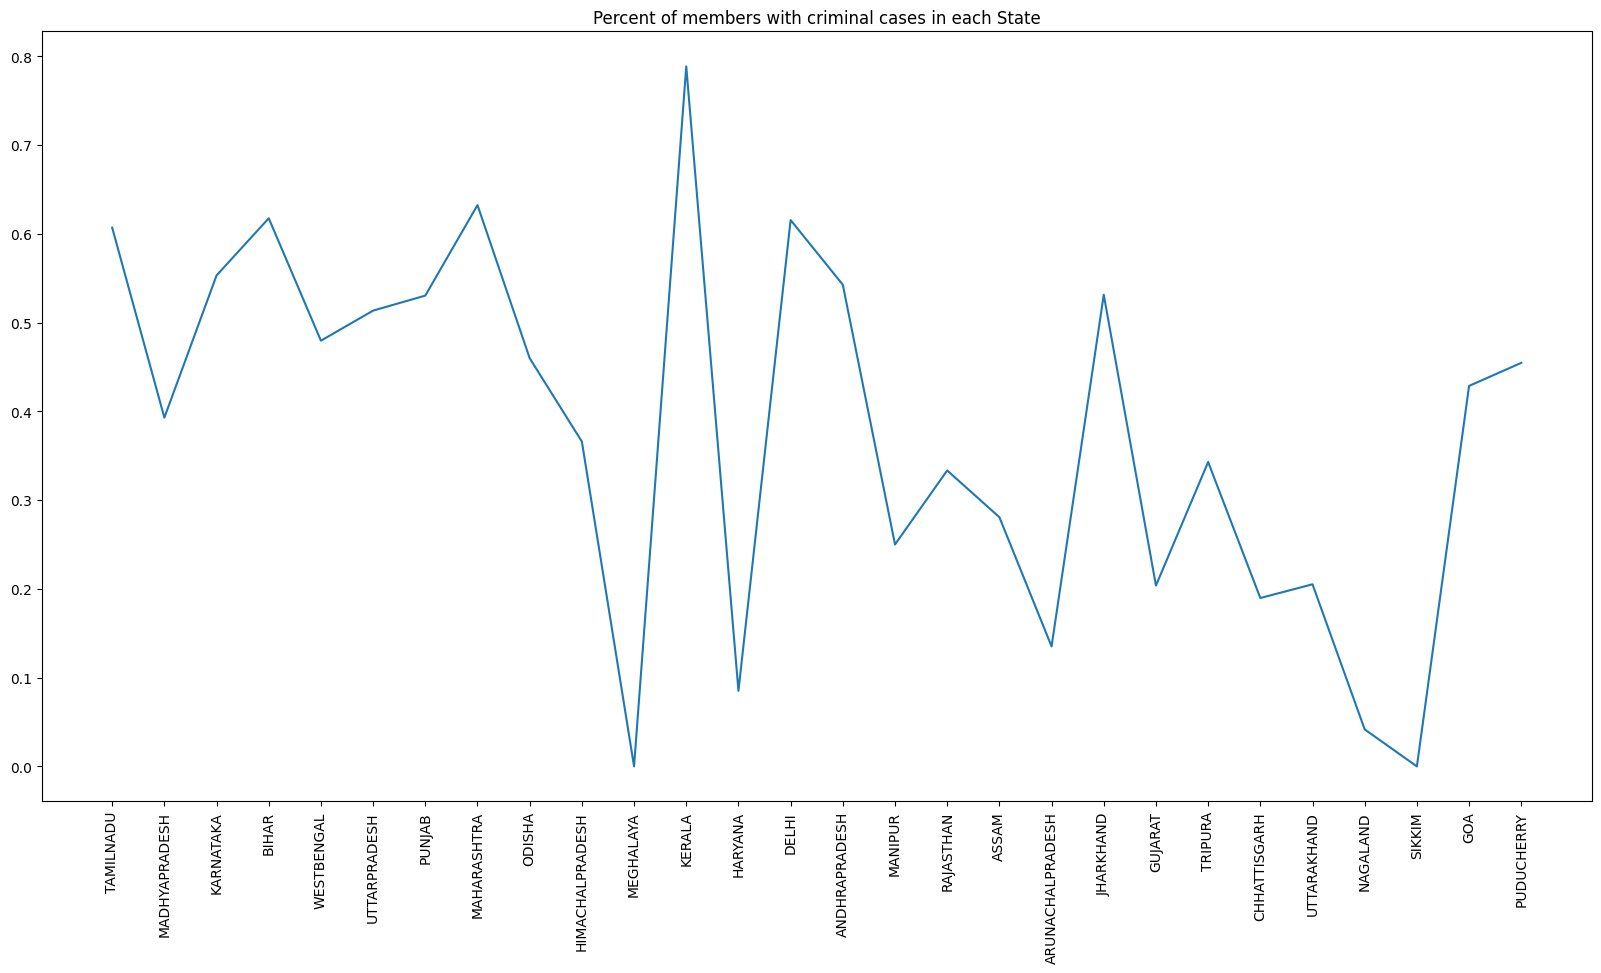

In [19]:
plt.figure(figsize=(20, 10))
plt.title('Percent of members with criminal cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 3], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


In [20]:
# Criminals vs Party
criminal_cases = []
for i in range(len(party)):
	# Take a sum of all the criminal cases in the state
	temp = (X[X['Party'] == i]['Criminal Case'])
	sum = temp.sum()
	count = temp[temp >= 1].count()
	avg = sum / len(X[X['Party'] == i])
	
	percent = count / len(X[X['Party'] == i])
	criminal_cases.append([sum, count, avg, percent])

/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_1398/2644693082.py:8: RuntimeWarning: invalid value encountered in scalar divide
  avg = sum / len(X[X['Party'] == i])
/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_1398/2644693082.py:10: RuntimeWarning: invalid value encountered in scalar divide
  percent = count / len(X[X['Party'] == i])


In [21]:
criminal_cases[3]

[165, 56, 1.2692307692307692, 0.4307692307692308]

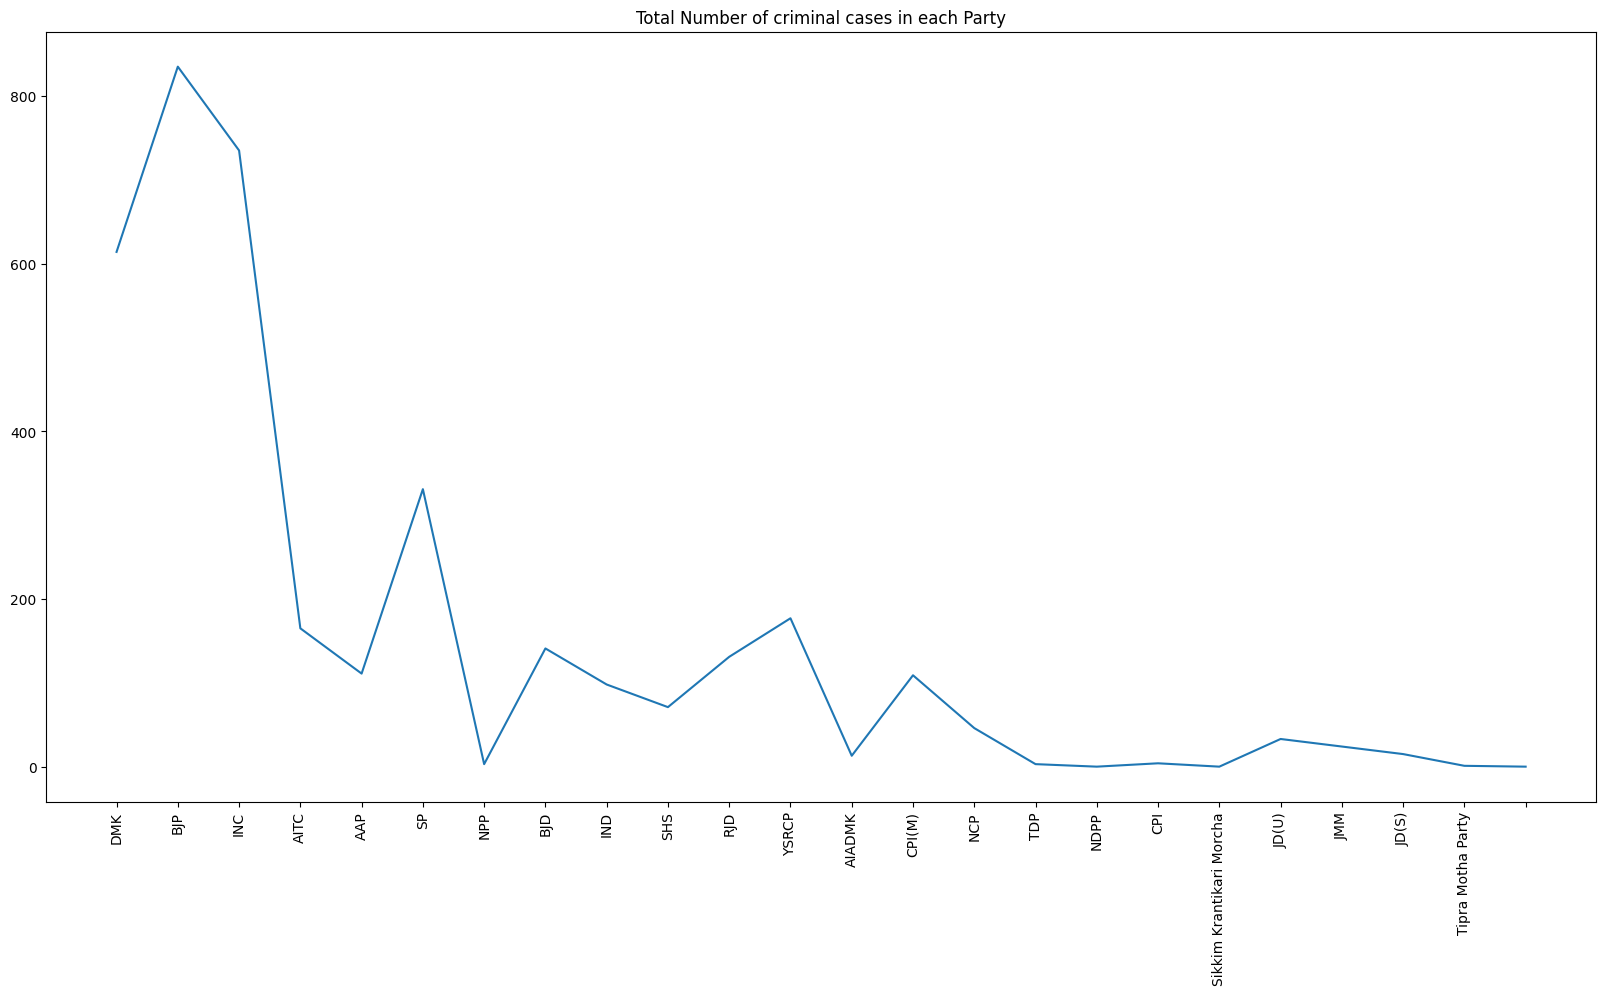

In [22]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Total Number of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 0], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


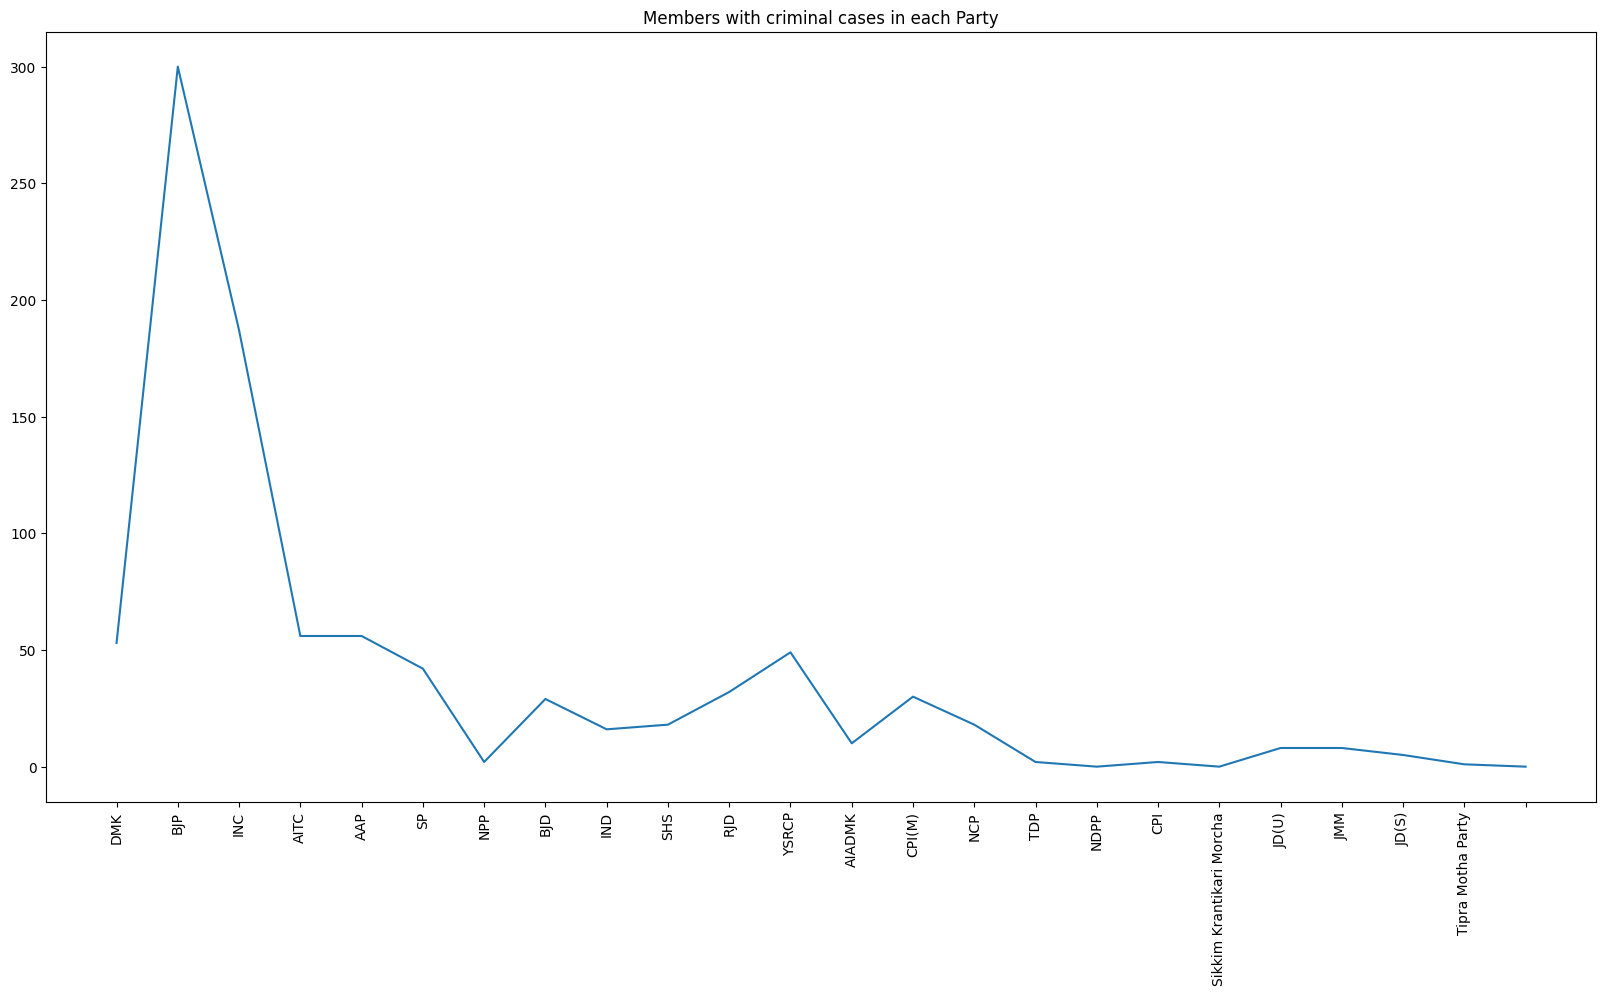

In [23]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Members with criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 1], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


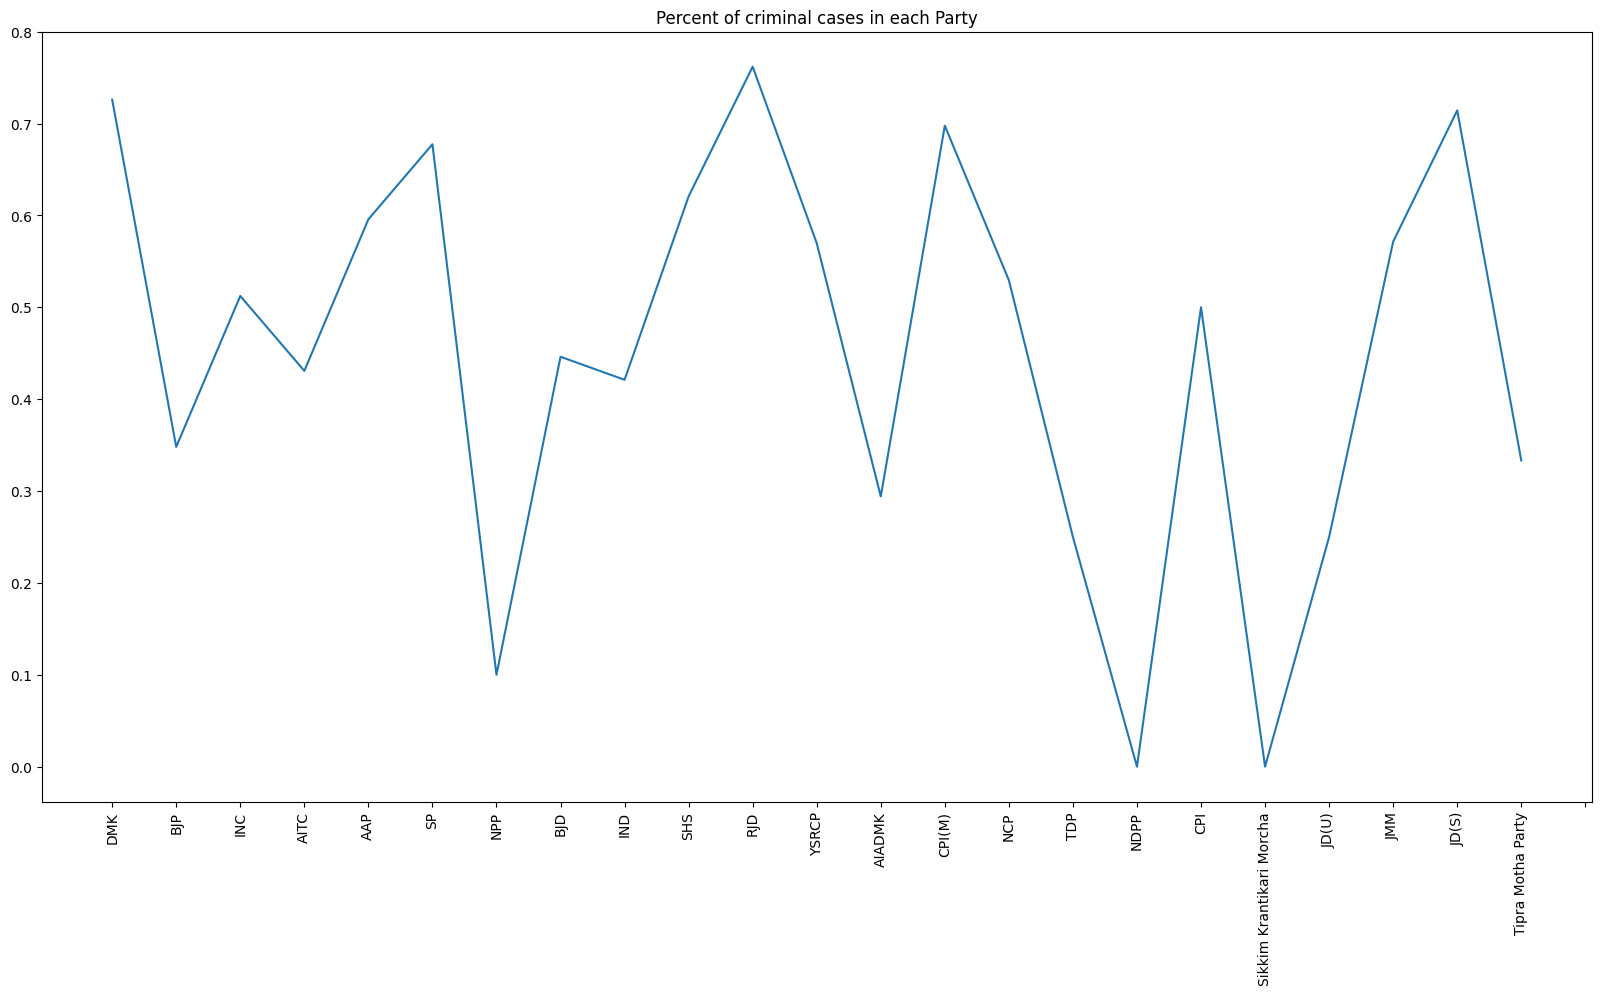

In [24]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Percent of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 3], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


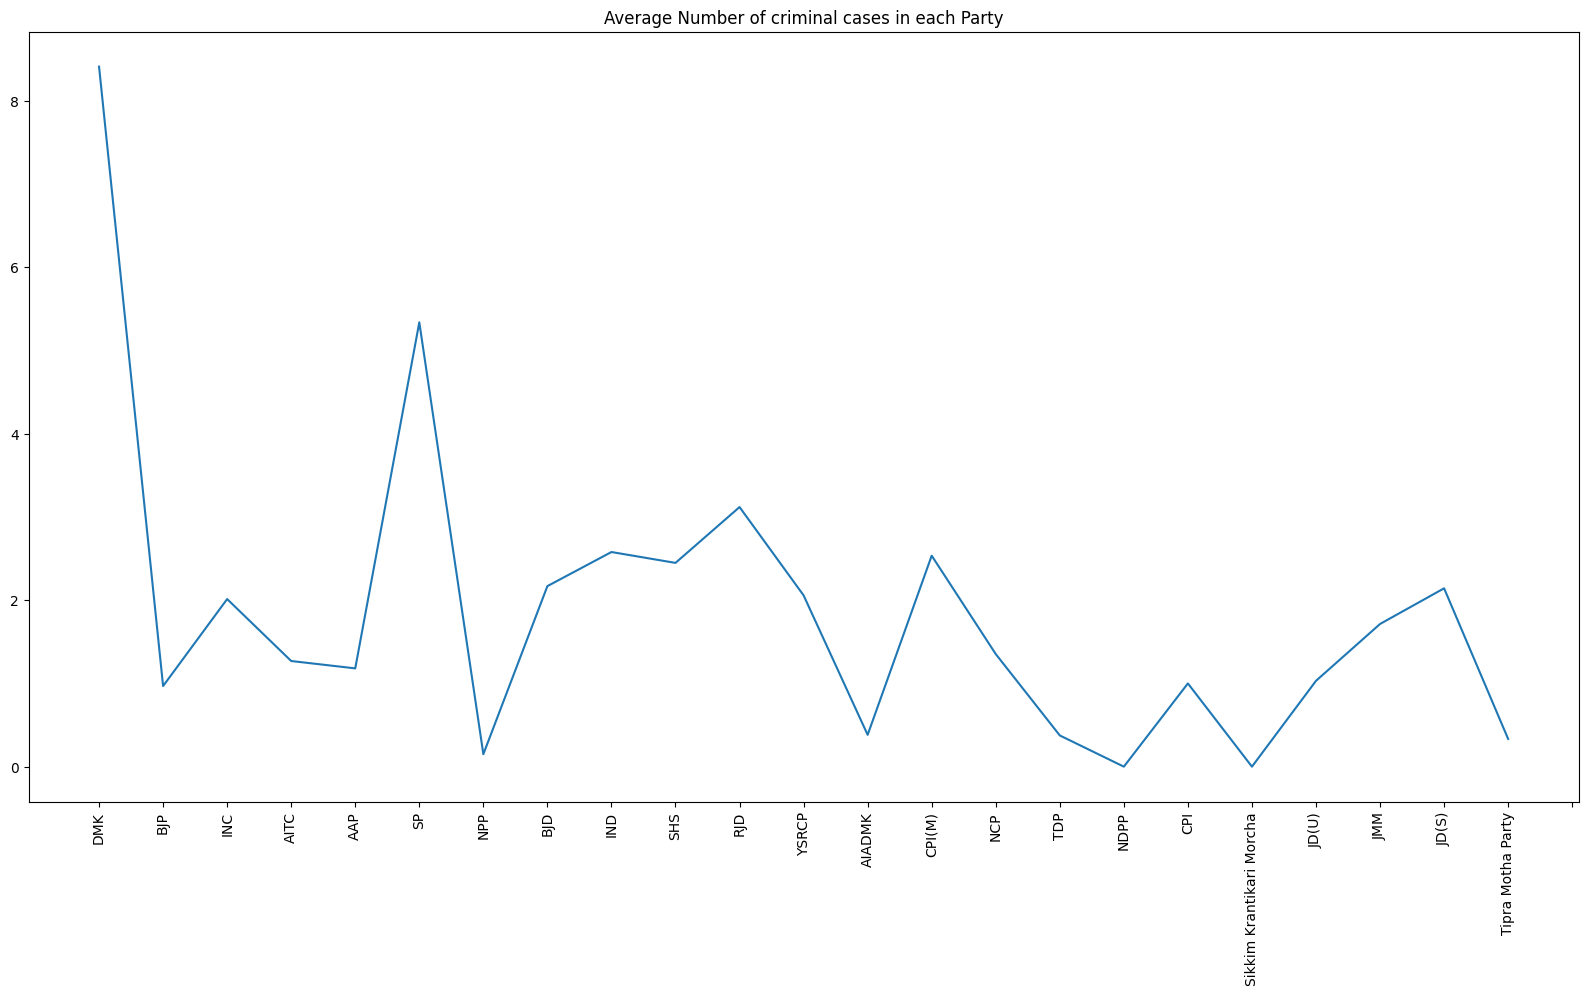

In [25]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Average Number of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 2], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


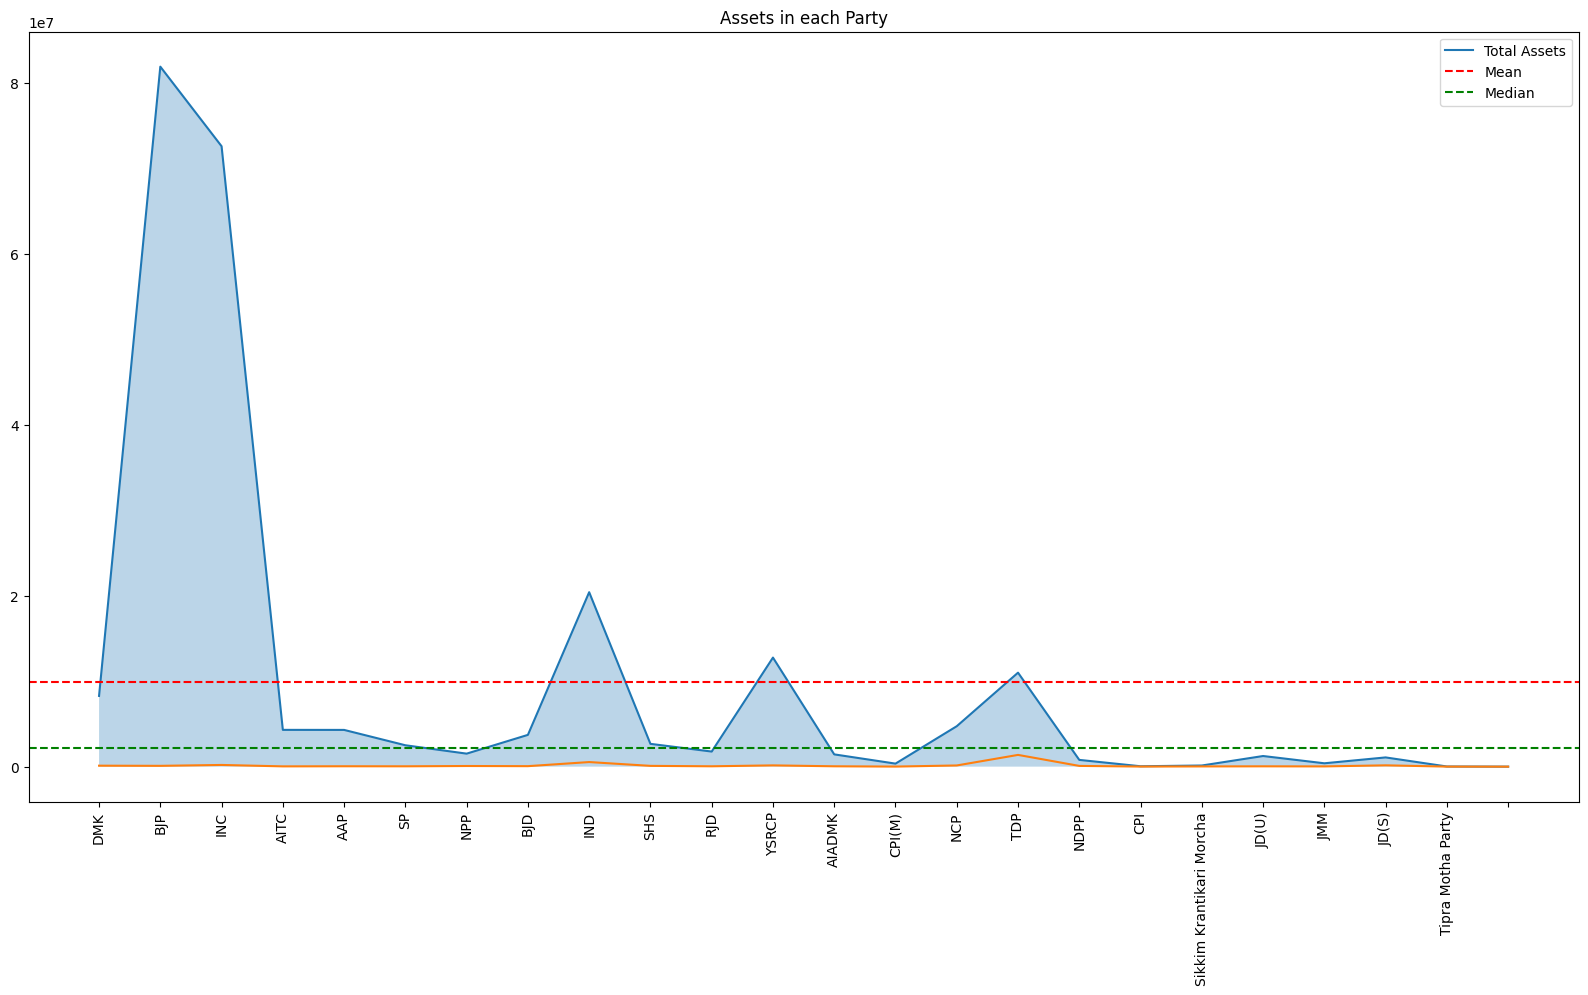

In [26]:
# Total Assets vs Party
total_assets = []
for i in range(len(party)):
	temp = (X[X['Party'] == i]['Total Assets'])
	# Convert to integer
	temp = temp.apply(lambda x: int(x))
	sum = temp.sum()
	avg = 0
	if(len(X[X['Party'] == i]) > 0):
		avg = sum / len(X[X['Party'] == i])
	total_assets.append([sum, avg])

total_assets = np.array(total_assets)
plt.figure(figsize=(20, 10))
plt.title('Assets in each Party')
X_labels = party.keys()
plt.plot(total_assets[:, 0], label='Total Assets')
# Add shade to it
plt.fill_between(np.arange(len(X_labels)), total_assets[:, 0], alpha=0.3)
# Add the mean as well
plt.axhline(np.mean(total_assets[:, 0]), color='r', linestyle='--', label='Mean')
# Add the median as well
plt.axhline(np.median(total_assets[:, 0]), color='g', linestyle='--', label='Median')
# Add the legend
plt.legend()
# Add the mean for each party
plt.plot(total_assets[:, 1], label='Total Assets')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


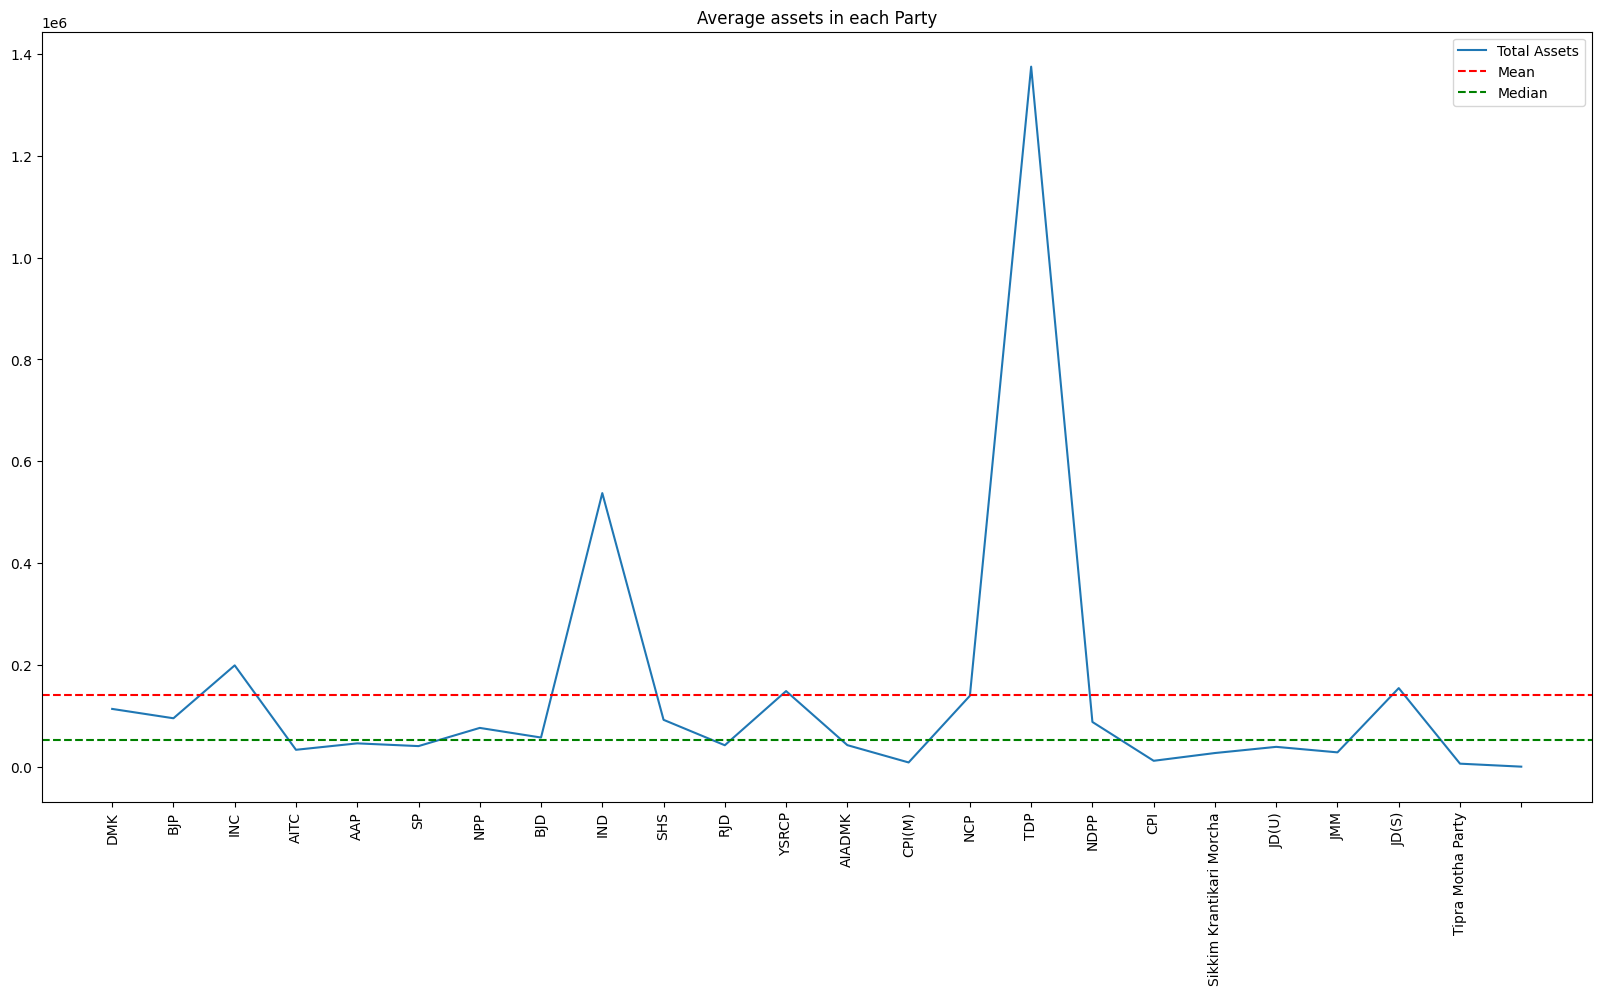

In [27]:
total_assets = np.array(total_assets)
plt.figure(figsize=(20, 10))
plt.title('Average assets in each Party')
X_labels = party.keys()
plt.plot(total_assets[:, 1], label='Total Assets')
# Add shade to it
# Add the mean as well
plt.axhline(np.mean(total_assets[:, 1]), color='r', linestyle='--', label='Mean')
# Add the median as well
plt.axhline(np.median(total_assets[:, 1]), color='g', linestyle='--', label='Median')
# Add the legend
plt.legend()
# Add the mean for each party

plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()

# Loading Synthetic Data

In [28]:
# Synthetic Data ten thousand rows from csv

df = pd.read_csv('./synthetic_data_best.csv')
# df = df[:1000]
X_Synthetic = df
for row in X_Synthetic.index:
	X_Synthetic.loc[row, "isDoctor"] = 0
	X_Synthetic.loc[row, "isAdvocate"] = 0
X_Synthetic['state'] = X_Synthetic['state'].map(state)
X_Synthetic['Party'] = X_Synthetic['Party'].map(party)
X_Synthetic['Education'] = X_Synthetic['Education'].map(education)
X_Synthetic

Party  Criminal Case  Total Assets  Liabilities  state  Education  \
0         5              4       1430000        10000      5          2   
1         1              1         10000          600     22          2   
2         1              0         10000          400     16          4   
3         1              2           400         2100     19          4   
4         6              0         10000         1600     10          2   
...     ...            ...           ...          ...    ...        ...   
7995      1              0        130000            0     18          4   
7996     13             23         10000         1900     11          1   
7997      1              0         50000       110000      4          3   
7998      1              2          6900         1200      5          2   
7999      8              1          5200       140000      7          5   

      isDoctor  isAdvocate  
0          0.0         0.0  
1          0.0         0.0  
2          0.0         0.0  
3          0.0         0.0  
4          0.0         0.0  
...        ...         ...  
7995       0.0         0.0  
7996       0.0         0.0  
7997       0.0         0.0  
7998       0.0         0.0  
7999       0.0         0.0  

[8000 rows x 8 columns]

In [29]:
# Append the synthetic data to the original data
df_combined = pd.concat([X, X_Synthetic], ignore_index=True)
X = df_combined


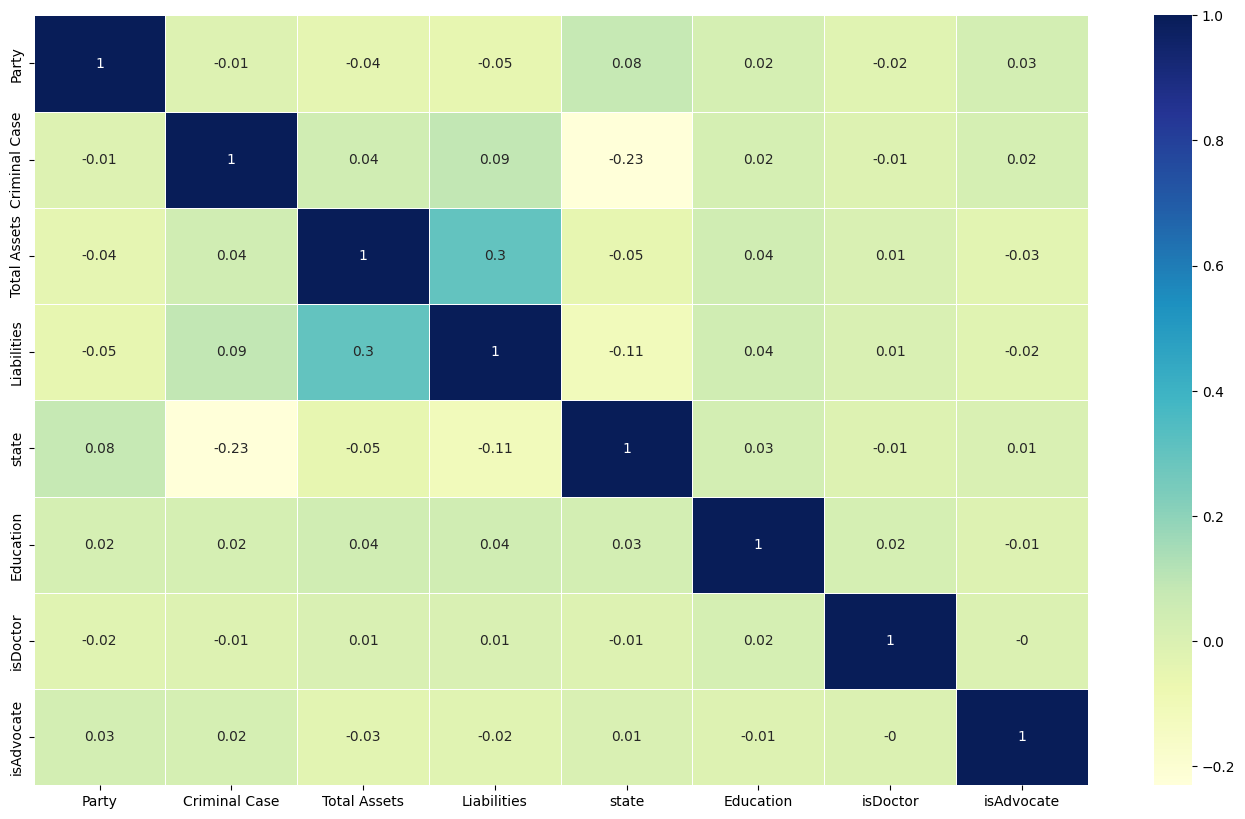

In [30]:
# Correlation matrix
plt.figure(figsize=(17,10))
sns.heatmap(X.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

In [31]:
X_Train_StateWise = []
Y_Train_StateWise = []
for i in range(len(state)):
	X_Train_StateWise.append(X[X['state'] == i].drop('state',axis=1))
	Y_Train_StateWise.append(X[X['state'] == i]['Education'])
Y = X['Education']

In [32]:
reversed_state = {value: key for key, value in state.items()}

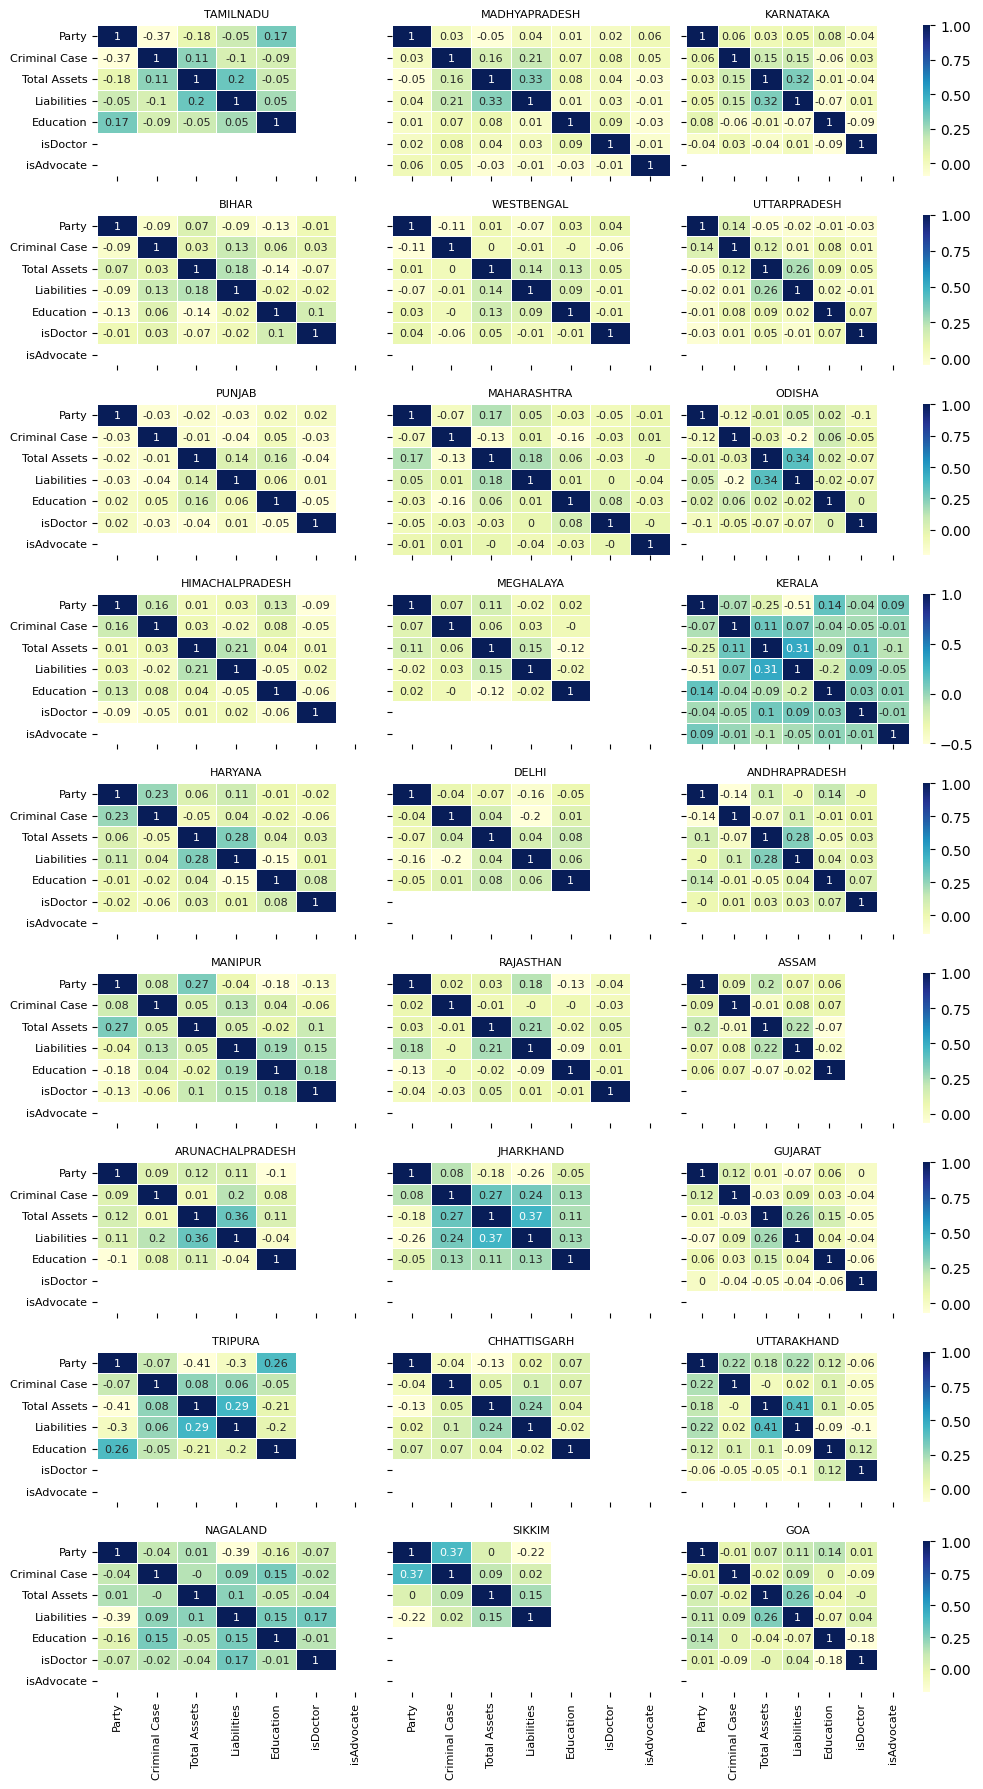

In [33]:
num_states = len(state)  # Calculate the number of states
cols = 3  # Adjust columns as needed (you'll get cols * rows subplots)
rows = (num_states // cols) + (num_states % cols > 0)  - 1 # Calculate rows for a balanced layout

fig, axes = plt.subplots(rows, cols, figsize=(10, 2 * rows))  # Create a figure with subplots

for i, state_df in enumerate(X_Train_StateWise):
    row = i // cols
    col = i % cols
    if(i == num_states - 1):
        break
    ax = axes[row, col]  # Access the subplot for the current state
    
    g = sns.heatmap(state_df.corr(method='spearman').round(2), 
                linewidth=0.5, annot=True, cmap="YlGnBu", ax=ax,
                fmt='.2g', annot_kws={"size": 8}, cbar=col == cols-1) # Changes here
    ax.set_title(f"{reversed_state[i]}", fontsize=8)  # Set the title for the current state
    if col != 0:
        ax.set_yticklabels([])
    if row != rows - 1:
        ax.set_xticklabels([])
    # Reduce font size (adjust depending on your visual needs)
    ax.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Adjust subplot spacing to prevent overlaps
plt.show()

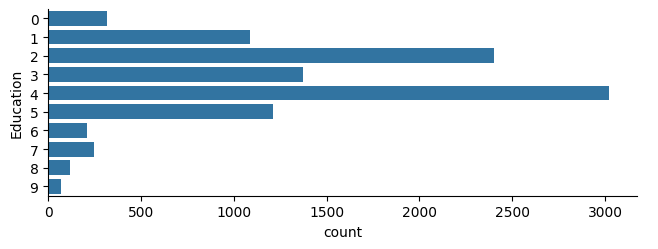

In [34]:
ax = sns.catplot(y="Education", kind="count", data=X, height=2.6, aspect=2.5, orient='h')

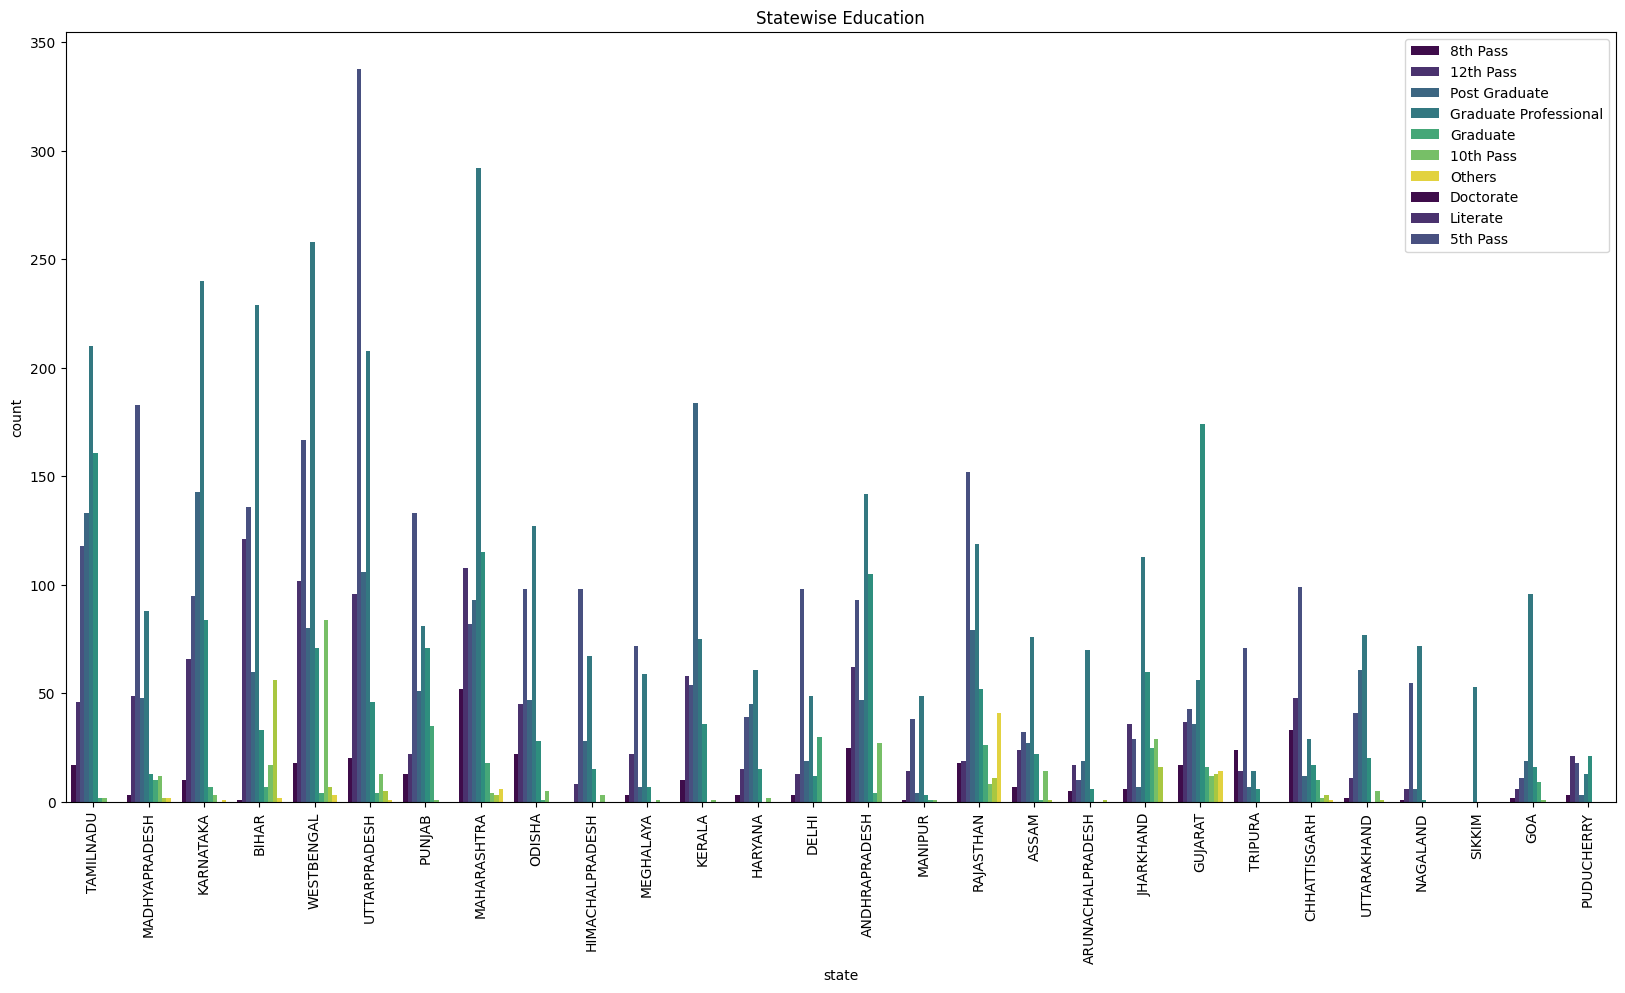

In [35]:
# SnS Plot for statewise education
plt.figure(figsize=(20, 10))
# Get X Labels
X_labels = reversed_state.values()
# Get Y Labels
Y_labels = education.keys()
sns.countplot(x='state', data=X, hue='Education', palette='viridis')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
# Legend
plt.legend(Y_labels, loc='upper right')
plt.title('Statewise Education')

plt.show()



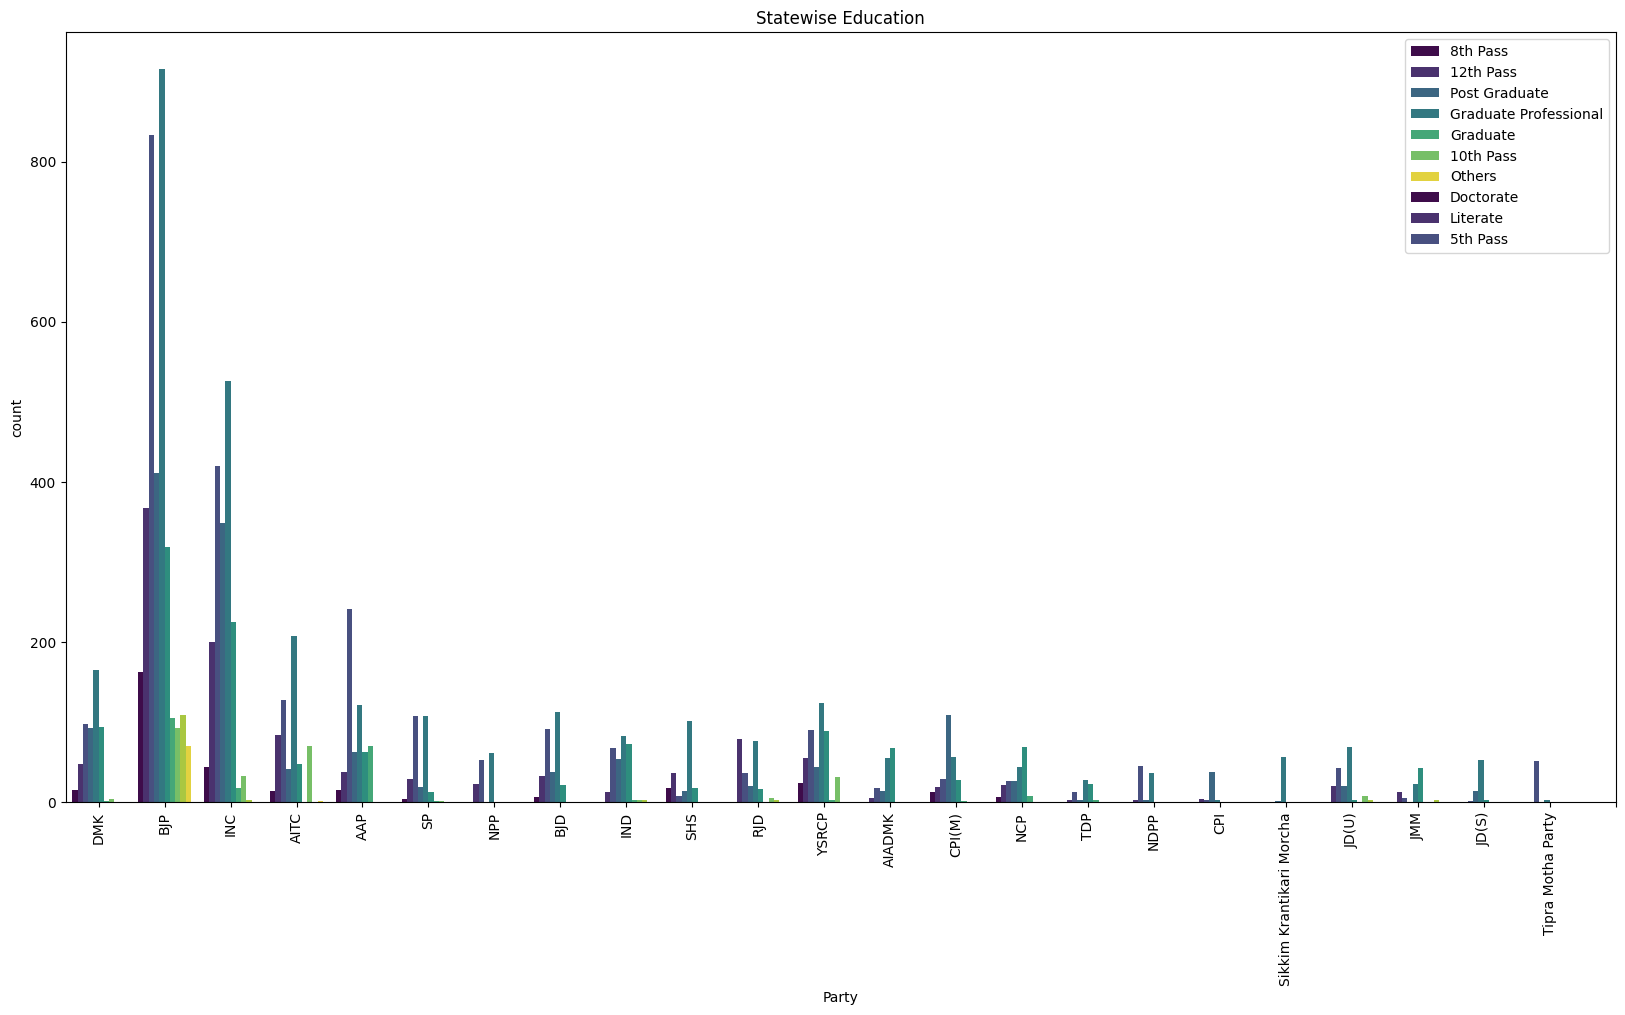

In [36]:
# SnS Plot for partywise education
plt.figure(figsize=(20, 10))
# Get X Labels
X_labels = party.keys()
# Get Y Labels
Y_labels = education.keys()
sns.countplot(x='Party', data=X, hue='Education', palette='viridis')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
# Legend
plt.legend(Y_labels, loc='upper right')
plt.title('Statewise Education')

plt.show()



In [37]:
# Criminal Case vs Party
criminal_cases = []
for i in range(len(state)):
	# Take a sum of all the criminal cases in the state
    temp = (X[X['state'] == i]['Criminal Case'])
    sum = temp.sum()
    count = temp[temp >= 1].count()
    avg = sum / len(X[X['state'] == i])
    percent = count / len(X[X['state'] == i])
    criminal_cases.append([sum, count, avg, percent])

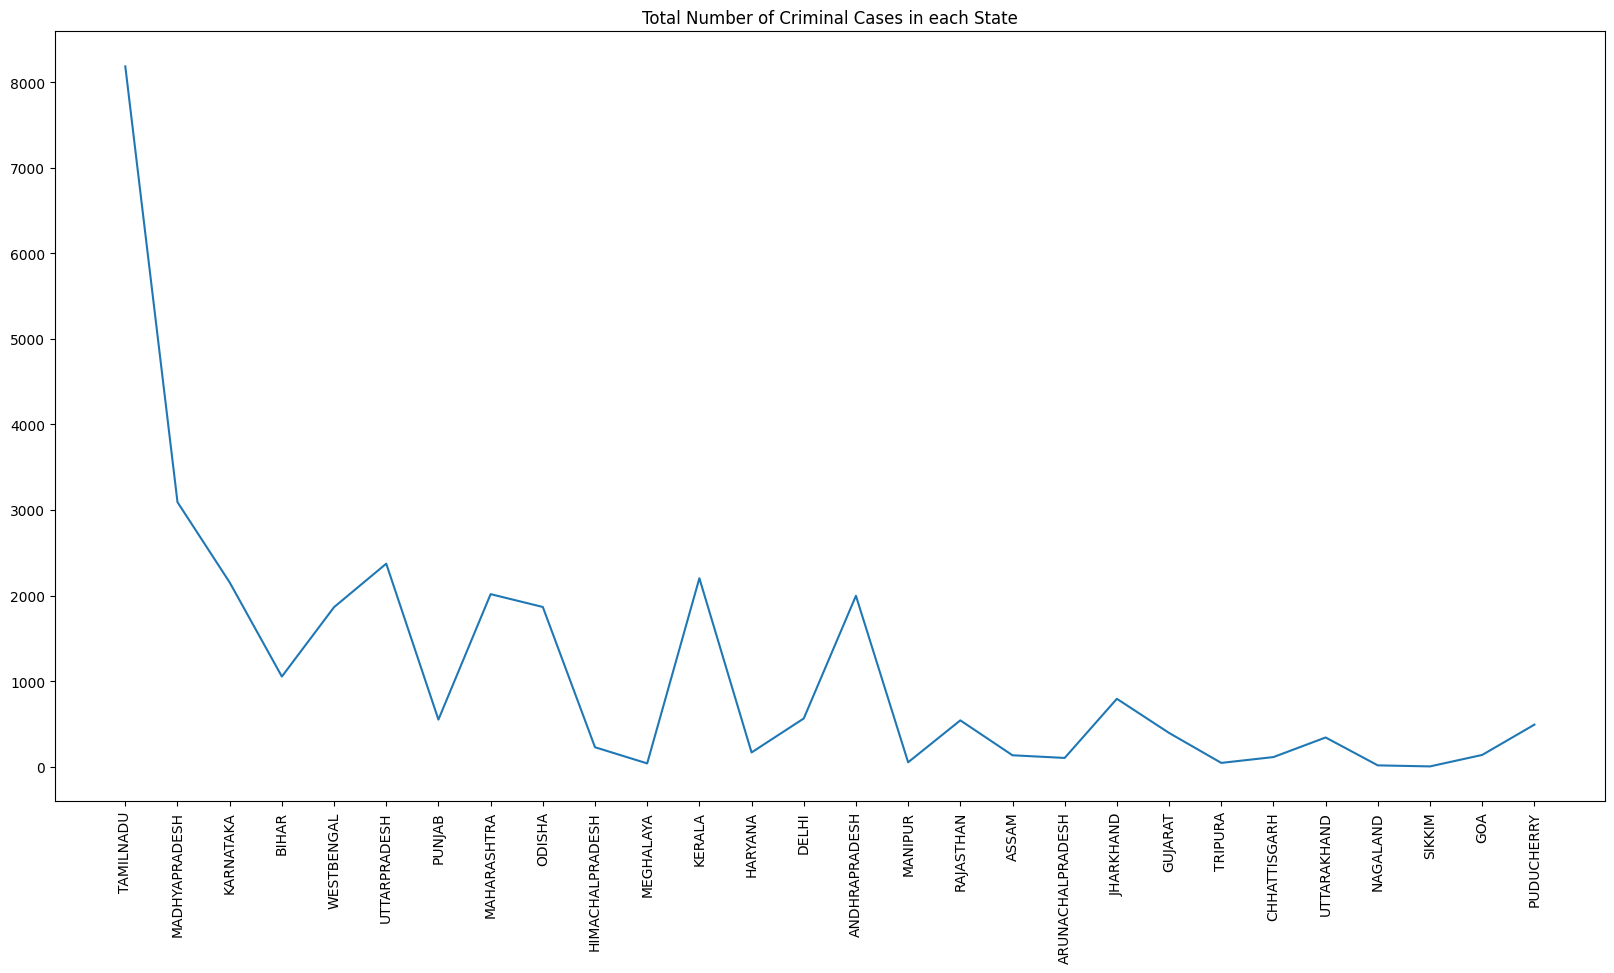

In [38]:
# Plots State Vs Criminal Cases

criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Total Number of Criminal Cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 0], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


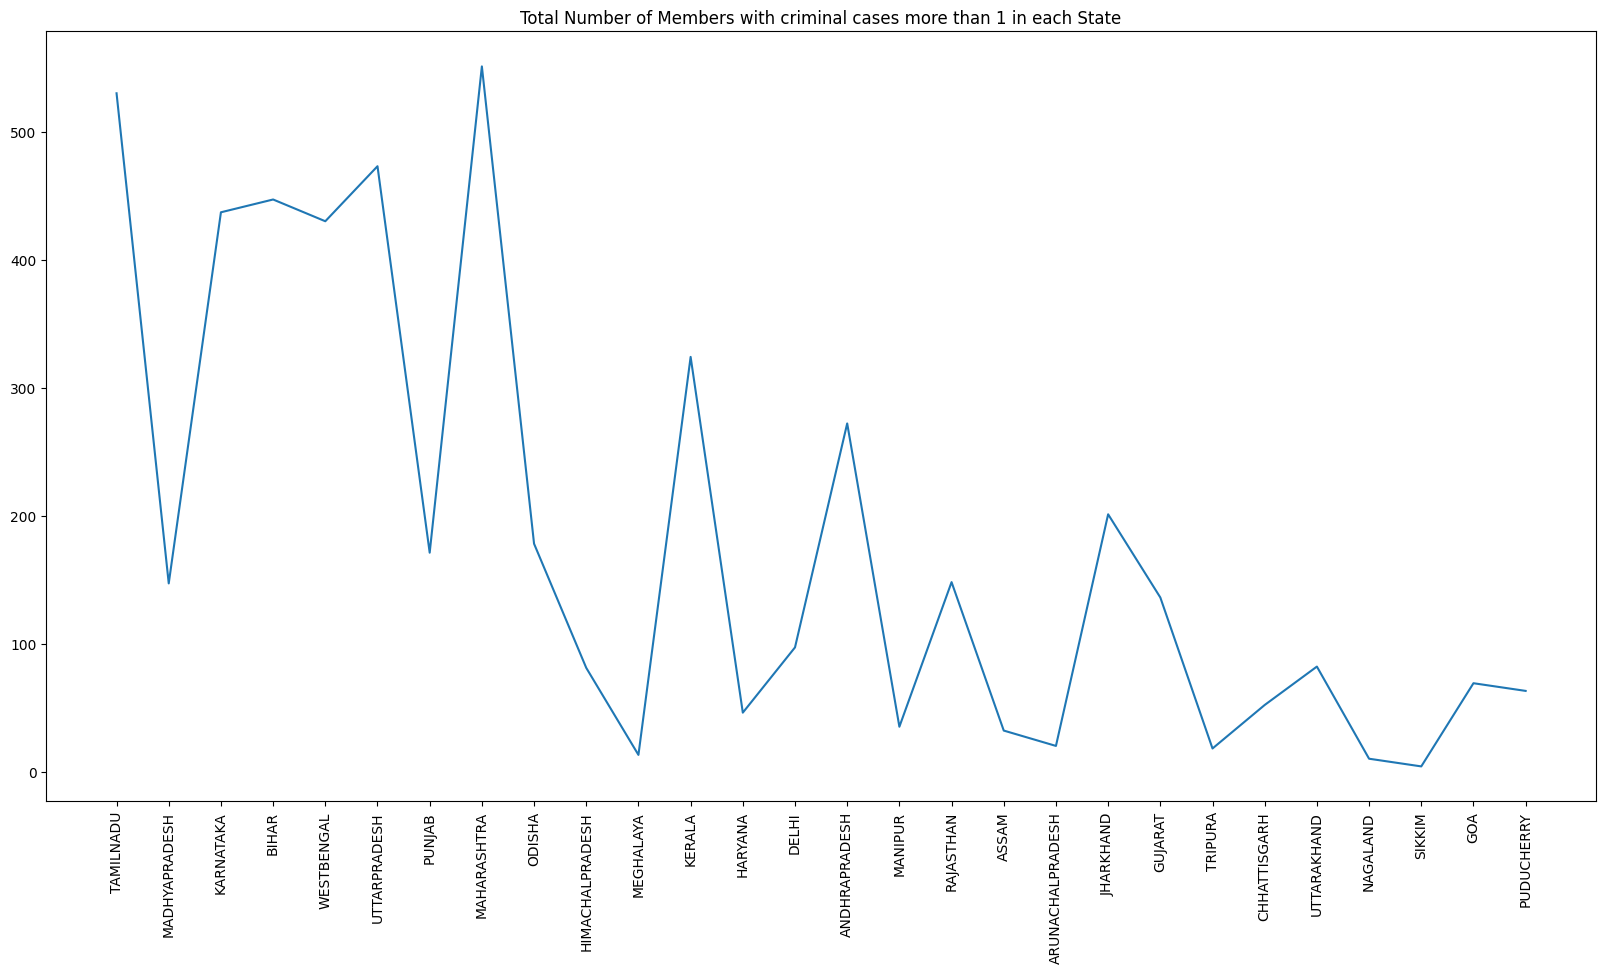

In [39]:

plt.figure(figsize=(20, 10))
plt.title('Total Number of Members with criminal cases more than 1 in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 1], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


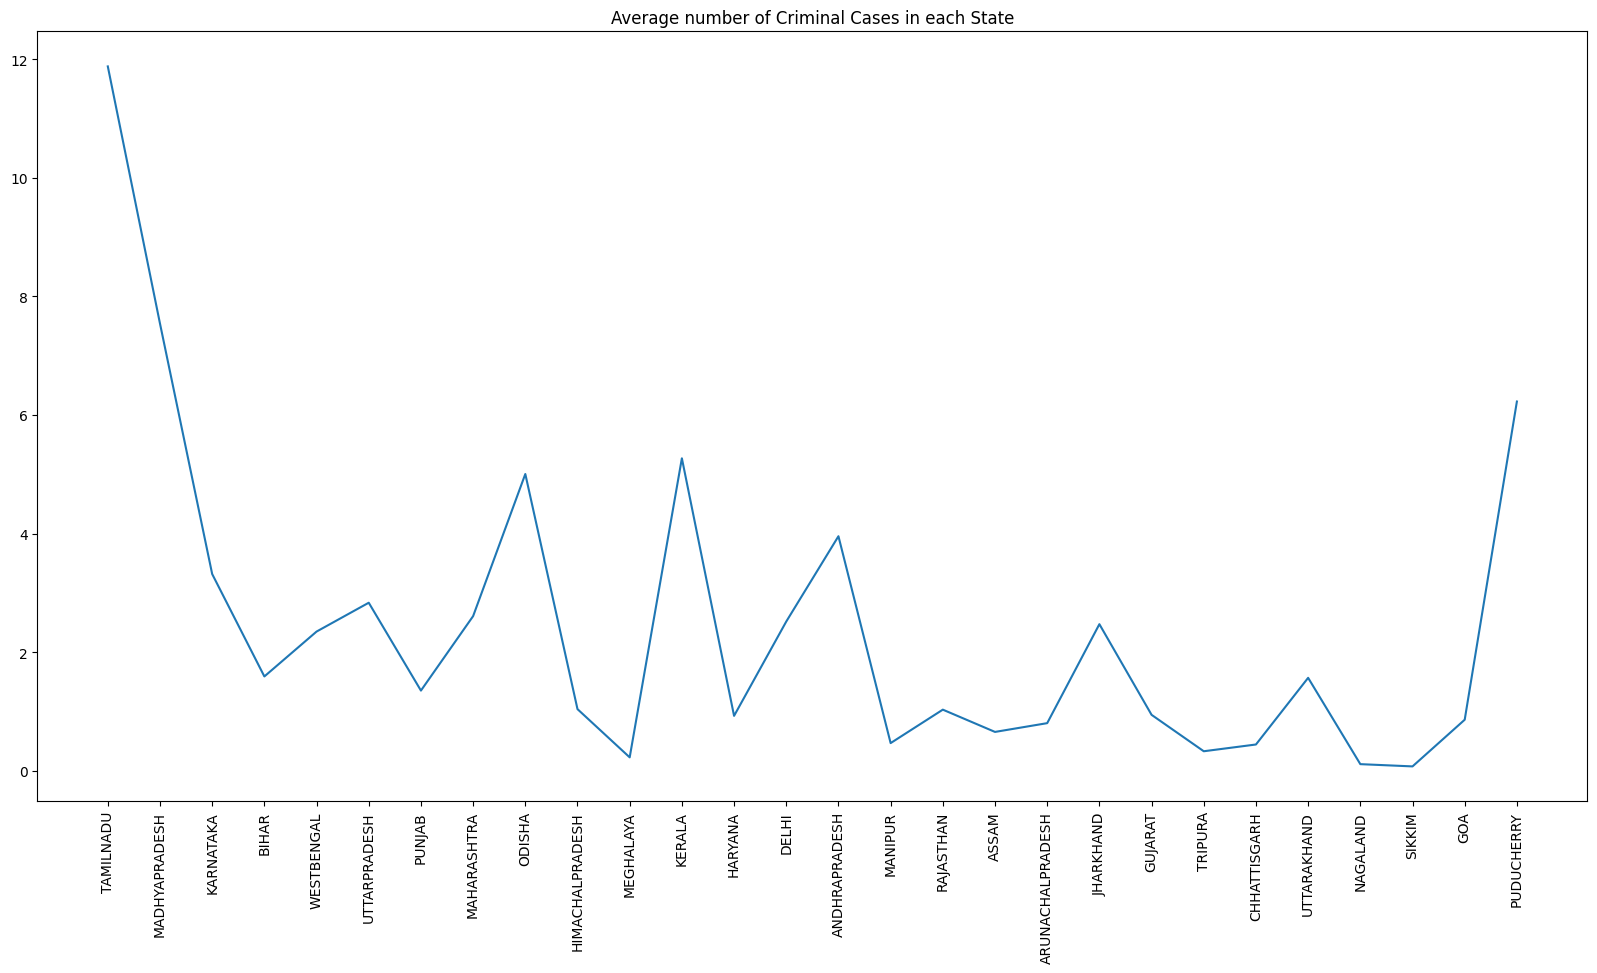

In [40]:
plt.figure(figsize=(20, 10))
plt.title('Average number of Criminal Cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 2], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


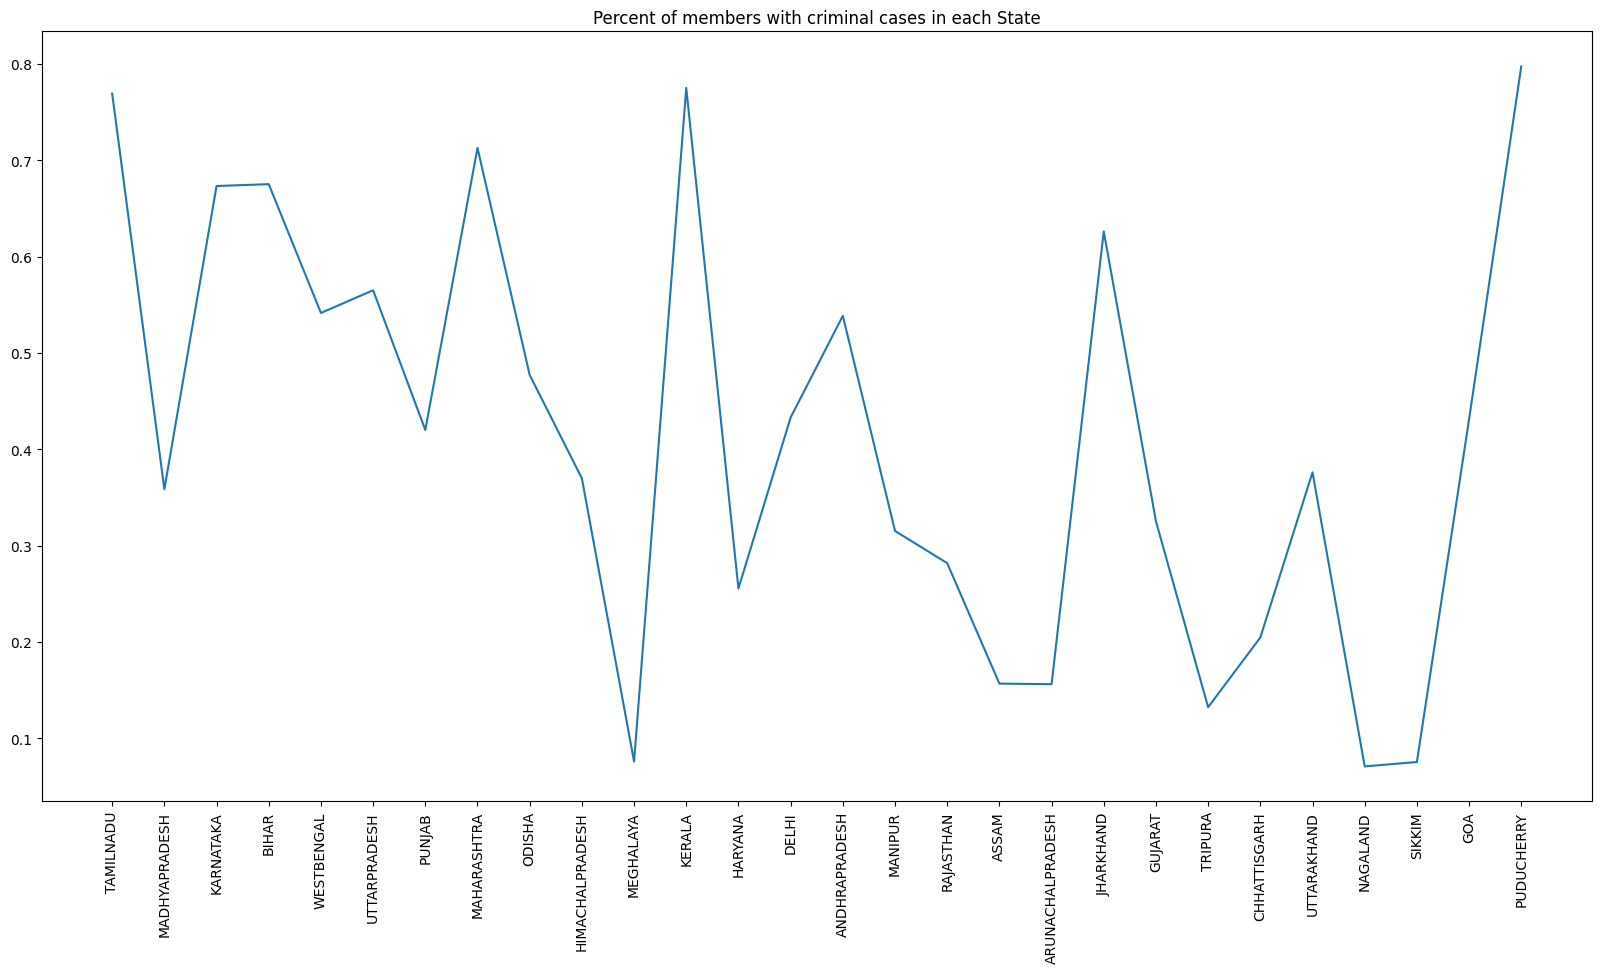

In [41]:
plt.figure(figsize=(20, 10))
plt.title('Percent of members with criminal cases in each State')
X_labels = reversed_state.values()
plt.plot(reversed_state.values(), criminal_cases[:, 3], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


In [42]:
# Criminals vs Party
criminal_cases = []
for i in range(len(party)):
	# Take a sum of all the criminal cases in the state
	temp = (X[X['Party'] == i]['Criminal Case'])
	sum = temp.sum()
	count = temp[temp >= 1].count()
	avg = sum / len(X[X['Party'] == i])
	
	percent = count / len(X[X['Party'] == i])
	criminal_cases.append([sum, count, avg, percent])

/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_1398/2644693082.py:8: RuntimeWarning: invalid value encountered in scalar divide
  avg = sum / len(X[X['Party'] == i])
/var/folders/dq/bh64zxfx1nn4xlf98w20zj0h0000gn/T/ipykernel_1398/2644693082.py:10: RuntimeWarning: invalid value encountered in scalar divide
  percent = count / len(X[X['Party'] == i])


In [43]:
criminal_cases[3]

[1030, 270, 1.7369308600337268, 0.45531197301854975]

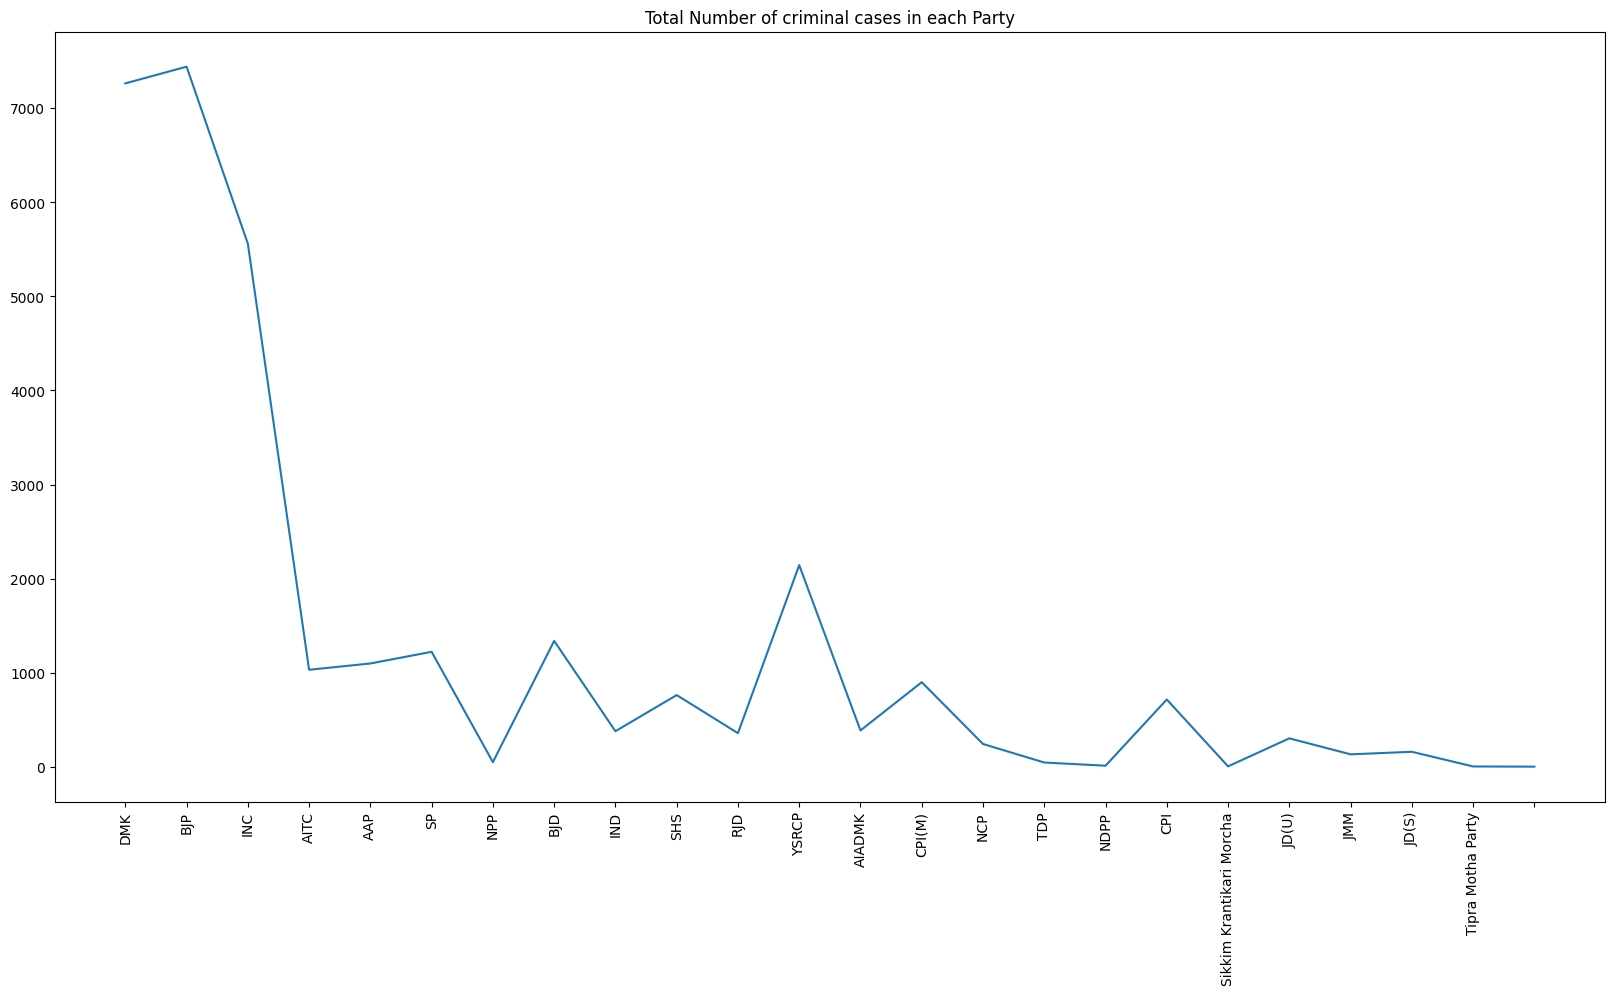

In [44]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Total Number of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 0], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


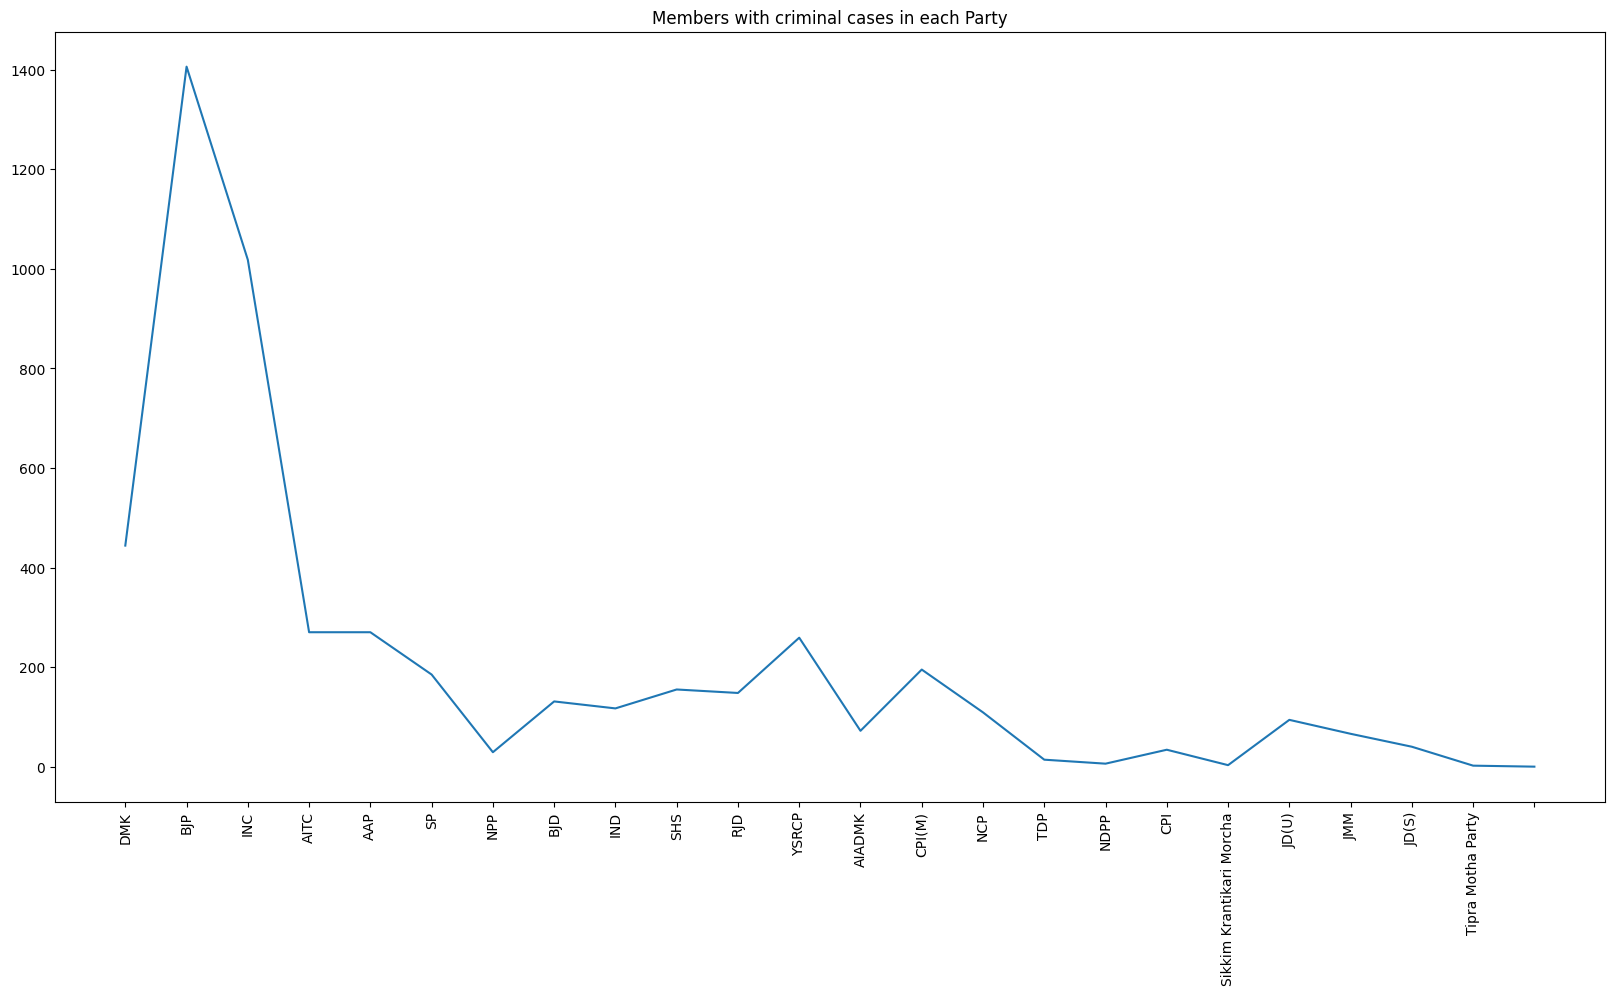

In [45]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Members with criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 1], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


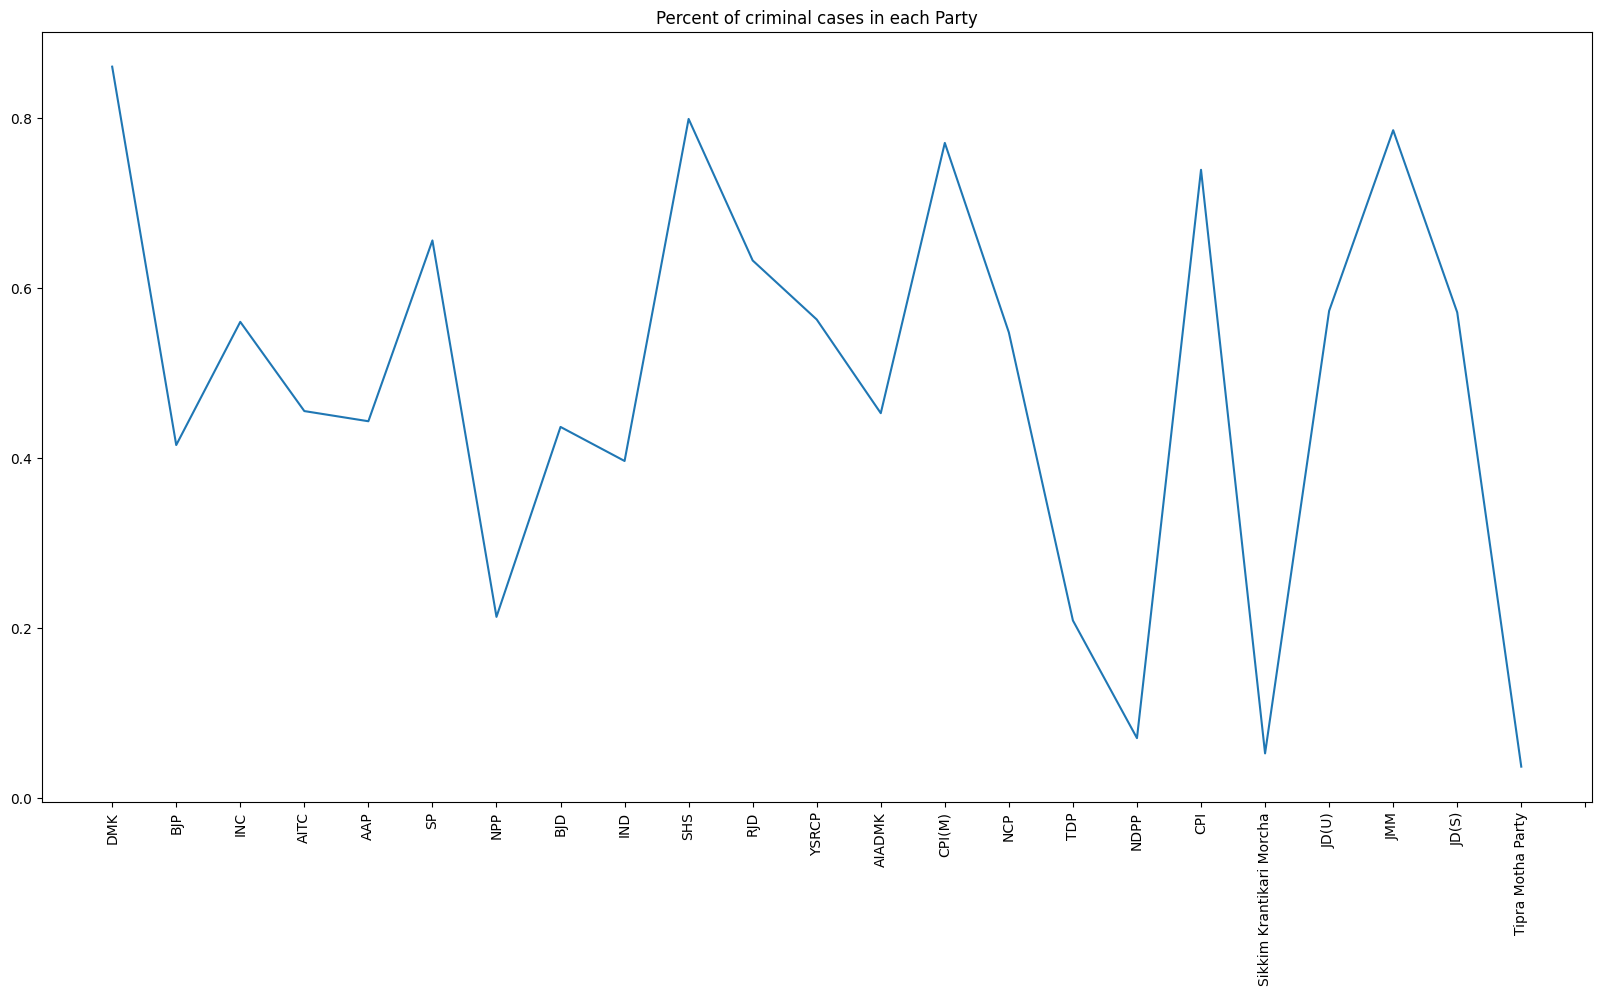

In [46]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Percent of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 3], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


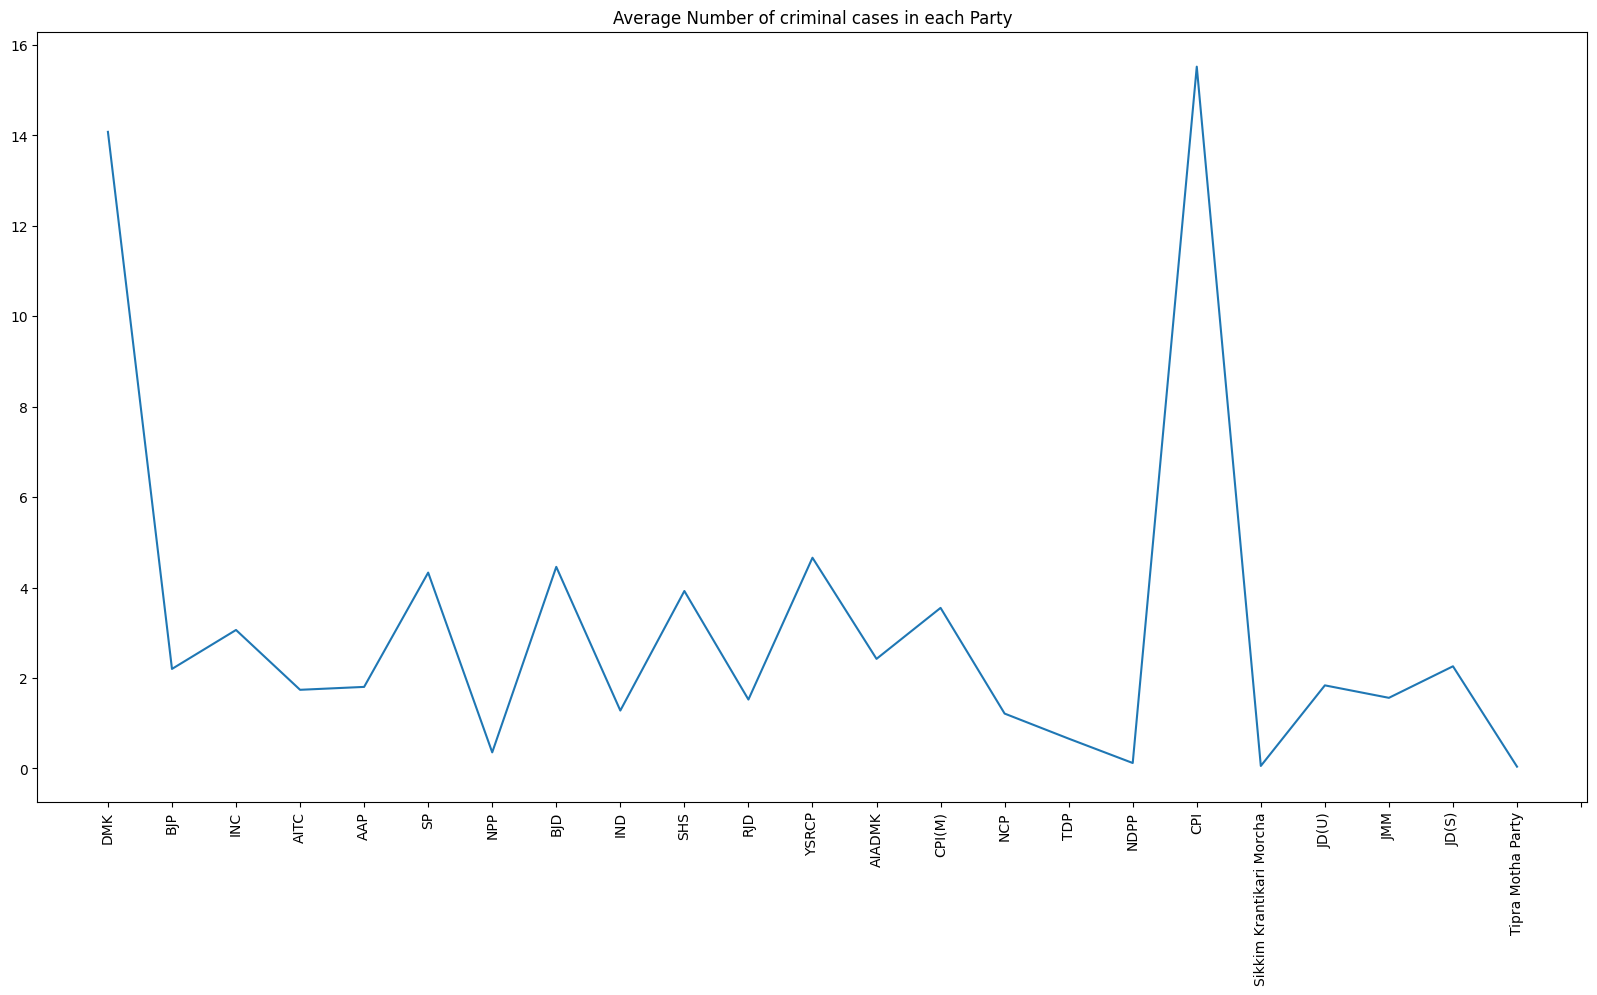

In [47]:
criminal_cases = np.array(criminal_cases)
plt.figure(figsize=(20, 10))
plt.title('Average Number of criminal cases in each Party')
X_labels = party.keys()
plt.plot(criminal_cases[:, 2], label='Total Criminal Cases')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


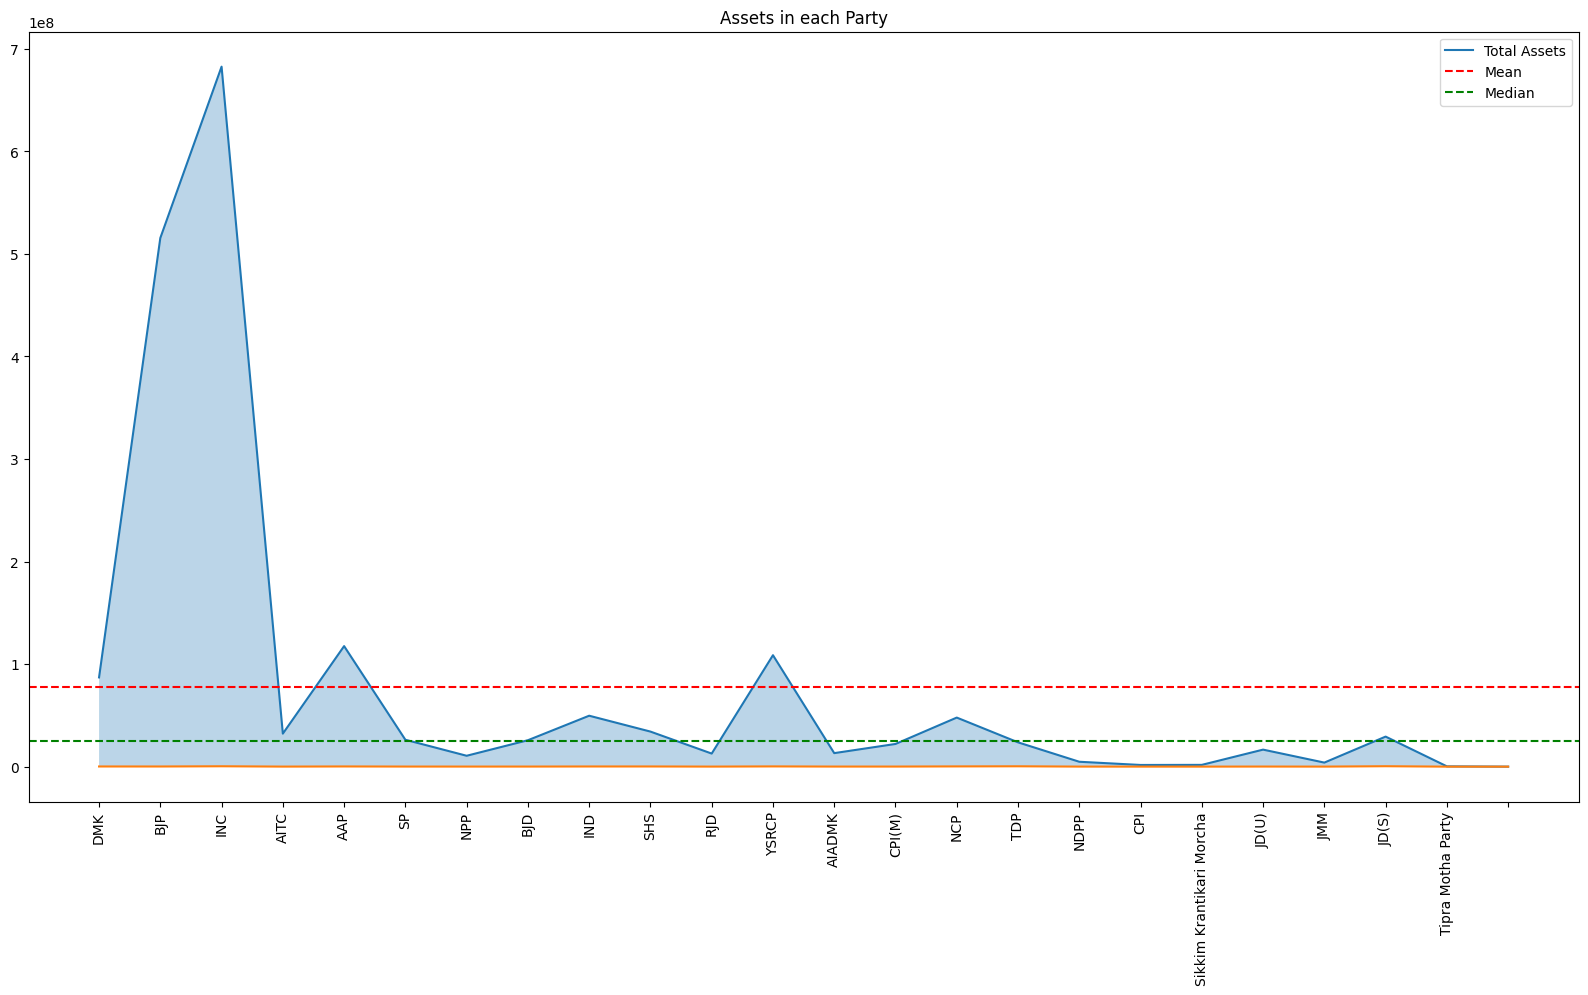

In [48]:
# Total Assets vs Party
total_assets = []
for i in range(len(party)):
	temp = (X[X['Party'] == i]['Total Assets'])
	# Convert to integer
	temp = temp.apply(lambda x: int(x))
	sum = temp.sum()
	avg = 0
	if(len(X[X['Party'] == i]) > 0):
		avg = sum / len(X[X['Party'] == i])
	total_assets.append([sum, avg])

total_assets = np.array(total_assets)
plt.figure(figsize=(20, 10))
plt.title('Assets in each Party')
X_labels = party.keys()
plt.plot(total_assets[:, 0], label='Total Assets')
# Add shade to it
plt.fill_between(np.arange(len(X_labels)), total_assets[:, 0], alpha=0.3)
# Add the mean as well
plt.axhline(np.mean(total_assets[:, 0]), color='r', linestyle='--', label='Mean')
# Add the median as well
plt.axhline(np.median(total_assets[:, 0]), color='g', linestyle='--', label='Median')
# Add the legend
plt.legend()
# Add the mean for each party
plt.plot(total_assets[:, 1], label='Total Assets')
plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()


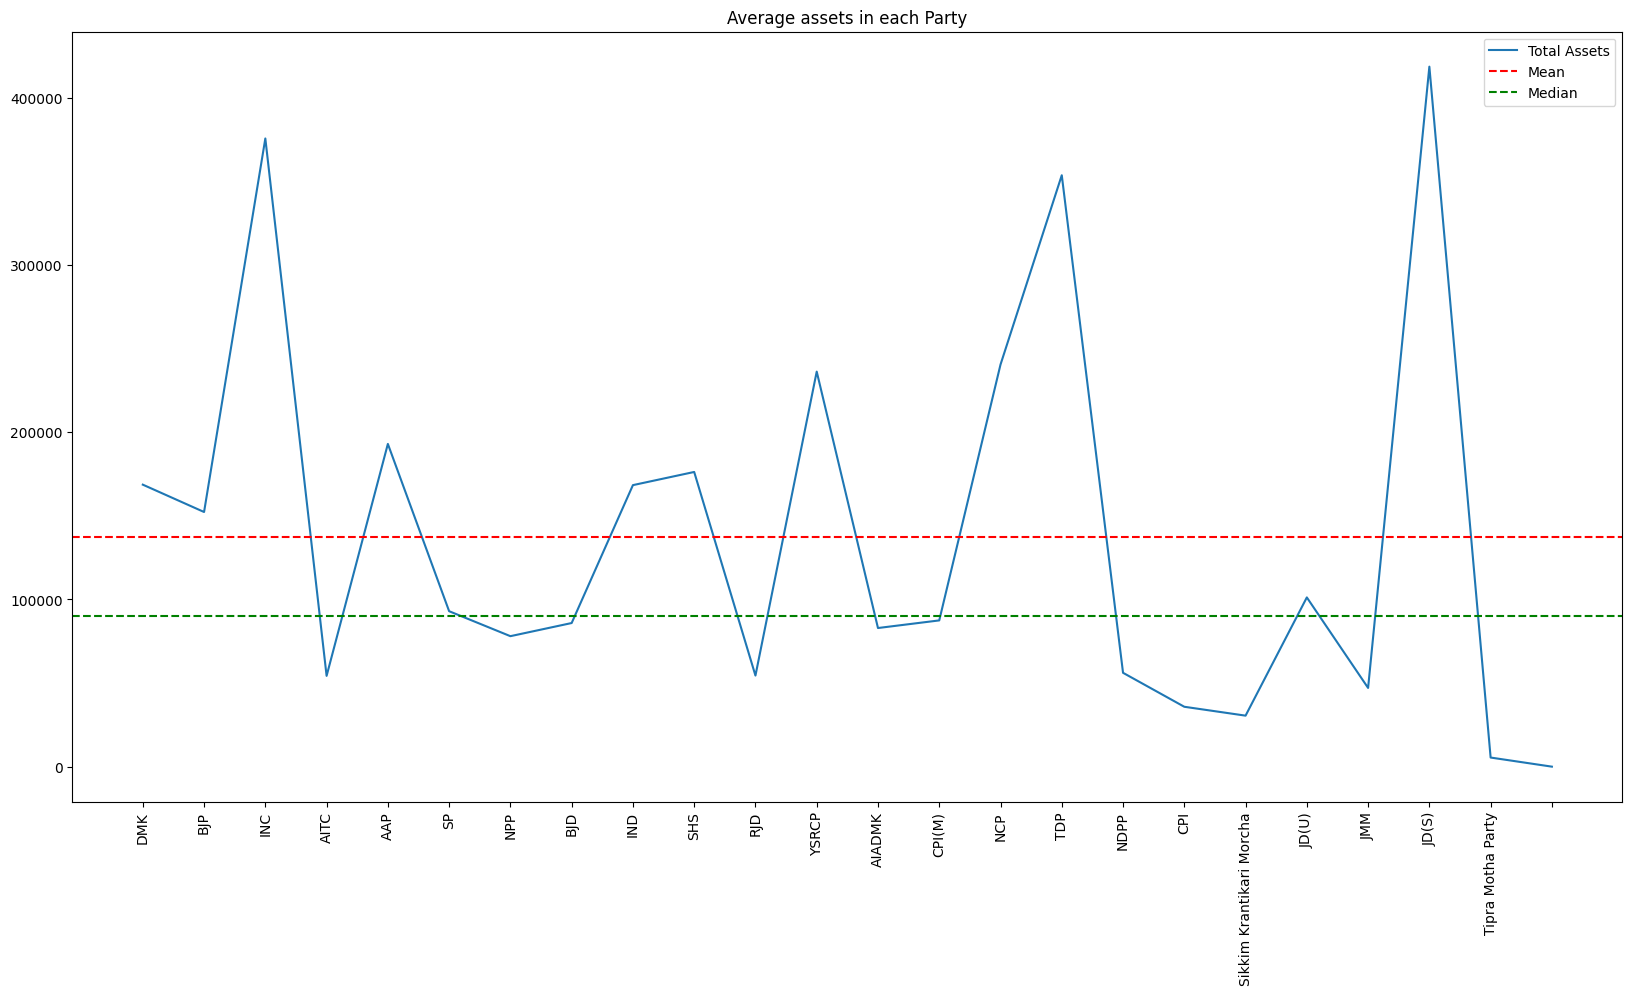

In [49]:
total_assets = np.array(total_assets)
plt.figure(figsize=(20, 10))
plt.title('Average assets in each Party')
X_labels = party.keys()
plt.plot(total_assets[:, 1], label='Total Assets')
# Add shade to it
# Add the mean as well
plt.axhline(np.mean(total_assets[:, 1]), color='r', linestyle='--', label='Mean')
# Add the median as well
plt.axhline(np.median(total_assets[:, 1]), color='g', linestyle='--', label='Median')
# Add the legend
plt.legend()
# Add the mean for each party

plt.xticks(np.arange(len(X_labels)), X_labels, rotation=90)
plt.show()

# PreProcessing

In [50]:
def test_preprocessing(X, state, party):
	for row in X.index:
		# Check for Dr. in the list
		if "Dr." in X.loc[row, "Candidate"]:
			X.loc[row, "isDoctor"] = 1
		else:
			X.loc[row, "isDoctor"] = 0
		if "Adv." in X.loc[row, "Candidate"]:
			X.loc[row, "isAdvocate"] = 1
		else:
			X.loc[row, "isAdvocate"] = 0
	X = X.drop('Candidate',axis=1)
	X = X.drop('Constituency ∇',axis=1)
	X.drop('ID',axis=1,inplace=True)
	for row in X.index:
		X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
		# print(X.loc[row, "Total Assets"][-4:])
		if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
		elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
		elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
			X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
			X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
		elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
			X.loc[row,  "Total Assets"] = "0"
	for row in X.index:
		if(X.loc[row, "Liabilities"][-4:] == "Lac+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
		elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
		elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
		elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
			X.loc[row, "Liabilities"] = "0"
	X['Party'] = X['Party'].map(party)
	X['state'] = X['state'].map(state)
	return X

def answer_preprocessing(X, state, party, education):
	for row in X.index:
		# Check for Dr. in the list
		if "Dr." in X.loc[row, "Candidate"]:
			X.loc[row, "isDoctor"] = 1
		else:
			X.loc[row, "isDoctor"] = 0
		if "Adv." in X.loc[row, "Candidate"]:
			X.loc[row, "isAdvocate"] = 1
		else:
			X.loc[row, "isAdvocate"] = 0
	X = X.drop('Candidate',axis=1)
	X = X.drop('Constituency ∇',axis=1)
	X.drop('ID',axis=1,inplace=True)
	for row in X.index:
		X.loc[row, "state"] = X.loc[row, "state"].replace(" ", "")
		# print(X.loc[row, "Total Assets"][-4:])
		if(X.loc[row, "Total Assets"][-4:] == "Lac+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-4]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 100)
		elif(X.loc[row, "Total Assets"][-6:] == "Crore+"):
			X.loc[row, "Total Assets"] = X.loc[row, "Total Assets"][:-6]
			X.loc[row, "Total Assets"] = str(int(X.loc[row, "Total Assets"]) * 10000)
		elif(X.loc[row,  "Total Assets"][-5:] == "Thou+"):
			X.loc[row,  "Total Assets"] = X.loc[row,  "Total Assets"][:-5]
			X.loc[row,  "Total Assets"] = str(int(X.loc[row,  "Total Assets"]))
		elif(X.loc[row,  "Total Assets"][-5:] == "Hund+"):
			X.loc[row,  "Total Assets"] = "0"
	for row in X.index:
		if(X.loc[row, "Liabilities"][-4:] == "Lac+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-4]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 100)
		elif(X.loc[row, "Liabilities"][-6:] == "Crore+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-6]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]) * 10000)
		elif(X.loc[row, "Liabilities"][-5:] == "Thou+"):
			X.loc[row, "Liabilities"] = X.loc[row, "Liabilities"][:-5]
			X.loc[row, "Liabilities"] = str(int(X.loc[row, "Liabilities"]))
		elif(X.loc[row, "Liabilities"][-5:] == "Hund+"):
			X.loc[row, "Liabilities"] = "0"
	X['Party'] = X['Party'].map(party)
	X['state'] = X['state'].map(state)
	X['Education'] = X['Education'].map(education)
	return X